# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6+ syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # ML estimates
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)
    

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        val_plus = a * np.exp(-0.5 * np.dot(np.subtract(X_test[i], mu_plus), np.subtract(X_test[i], mu_plus)))
        val_minus = (1-a) * np.exp(-0.5 * np.dot(np.subtract(X_test[i], mu_minus), np.subtract(X_test[i], mu_minus)))
        if val_plus >= val_minus: # higher eta (val) => lower loss
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # ML estimates
    n = Y_train.shape[0]
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)

    d = X_train[0].shape[0]
    cov_shape = (d,d)
    cov = np.zeros(shape=cov_shape)
    for i in range(n):
        if Y_train[i] == 1:
            cov = np.add(cov, np.outer(np.subtract(X_train[i], mu_plus), np.subtract(X_train[i], mu_plus)))
        else:
            cov = np.add(cov, np.outer(np.subtract(X_train[i], mu_minus), np.subtract(X_train[i], mu_minus)))
    cov = cov/n
    cov_inv = np.linalg.inv(cov)

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m): # higher eta (val) => lower loss
        val_plus = a * np.exp(-0.5 * np.dot(np.subtract(X_test[i], mu_plus), np.matmul(cov_inv, np.subtract(X_test[i], mu_plus))))
        val_minus = (1-a) * np.exp(-0.5 * np.dot(np.subtract(X_test[i], mu_minus), np.matmul(cov_inv, np.subtract(X_test[i], mu_minus))))
        if val_plus >= val_minus:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred


def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    # ML estimates
    n = Y_train.shape[0]
    n_plus = np.size(Y_train[Y_train==1])
    n_minus = np.size(Y_train[Y_train==-1])
    a = np.size(Y_train[Y_train==1])/np.size(Y_train)
    mu_minus = np.mean(X_train[Y_train==-1], axis=0)
    mu_plus = np.mean(X_train[Y_train==1], axis=0)
    d = X_train[0].shape[0]
    cov_plus = np.zeros(shape=(d,d))
    cov_minus = np.zeros(shape=(d,d))
    for i in range(n):
        if Y_train[i] == 1:
            cov_plus = np.add(cov_plus, np.outer(np.subtract(X_train[i], mu_plus), np.subtract(X_train[i], mu_plus)))
        else:
            cov_minus = np.add(cov_minus, np.outer(np.subtract(X_train[i], mu_minus), np.subtract(X_train[i], mu_minus)))
    cov_plus = cov_plus/n_plus
    cov_minus = cov_minus/n_minus
    cov_plus_inv = np.linalg.inv(cov_plus)
    cov_minus_inv = np.linalg.inv(cov_minus)
    det_cov_plus = np.linalg.det(cov_plus)
    det_cov_minus = np.linalg.det(cov_minus)

    m = X_test.shape[0]
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        val_plus = a * (np.exp(-0.5*np.dot(np.subtract(X_test[i], mu_plus), np.matmul(cov_plus_inv, np.subtract(X_test[i], mu_plus)))))/np.sqrt(det_cov_plus)
        val_minus = (1-a) * (np.exp(-0.5*np.dot(np.subtract(X_test[i], mu_minus), np.matmul(cov_minus_inv, np.subtract(X_test[i], mu_minus)))))/np.sqrt(det_cov_minus)
        if val_plus >= val_minus: # higher eta (val) => lower loss
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1
    return Y_test_pred

    





In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

def accuracy_score(y_true, y_pred):
    return np.size(y_pred[y_true == y_pred])/np.size(y_pred)

print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1a))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1b))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_1c))



0.875
0.8745
0.8725


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


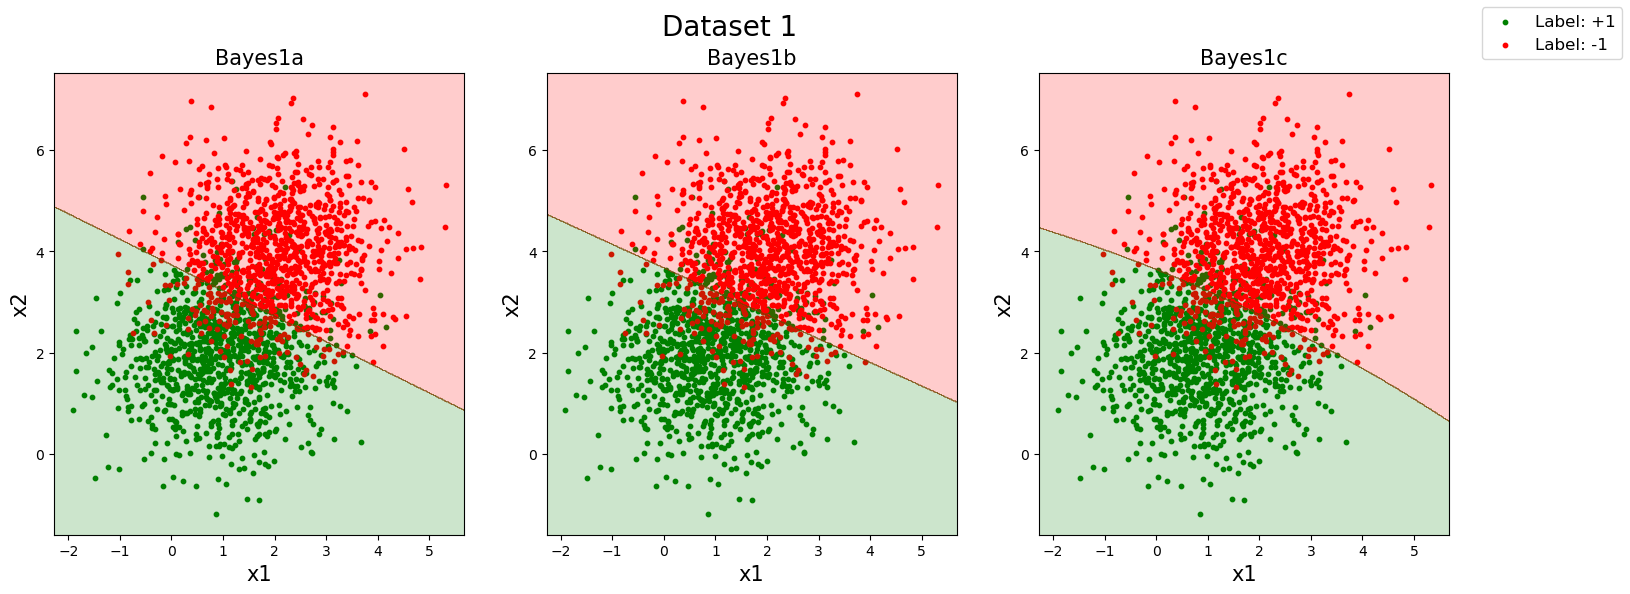

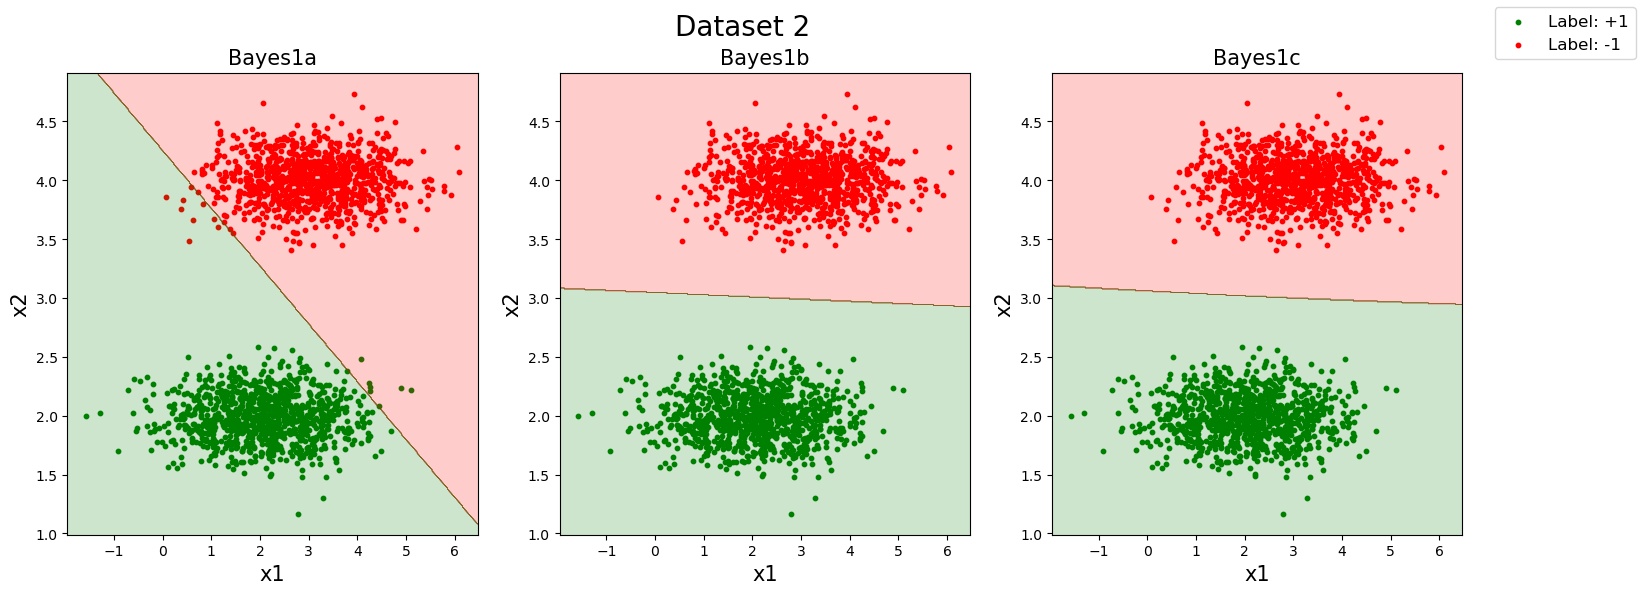

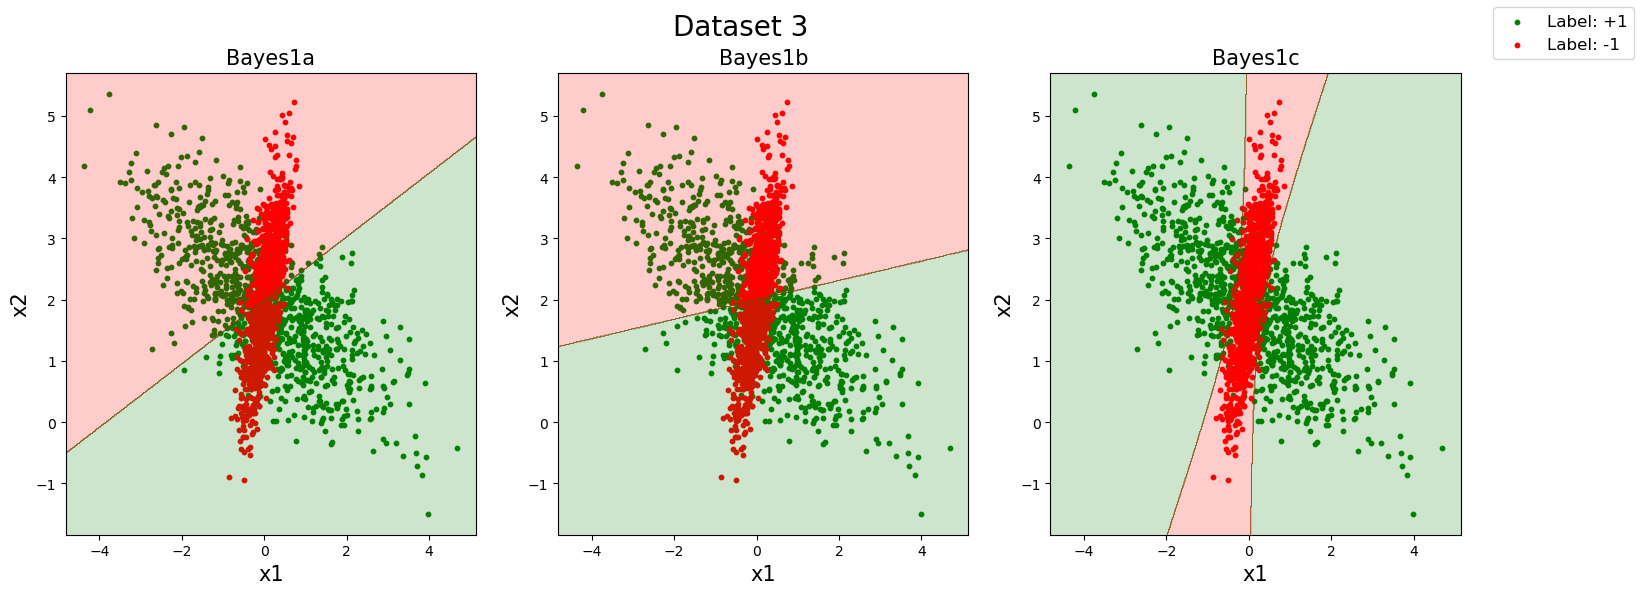

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

dataset1 = [0, 0, 0]
# Load datasets
dataset1[0] = np.load("Datasets/dataset1_1.npz")
dataset1[1] = np.load("Datasets/dataset1_2.npz")
dataset1[2] = np.load("Datasets/dataset1_3.npz")
for i in range(3):
    X_train = dataset1[i]['arr_0']
    Y_train = dataset1[i]['arr_1']
    X_test = dataset1[i]['arr_2']
    Y_test = dataset1[i]['arr_3']
    Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
    Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
    Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)
    X_train_plus = X_train[Y_train==1]
    X_train_minus = X_train[Y_train==-1]

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))

    # Scatter plots of the training data points
    line1 = ax1.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    line2 = ax1.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax1.set_title(label="Bayes1a", fontsize=15)
    ax1.set_xlabel(xlabel="x1", fontsize=15)
    ax1.set_ylabel(ylabel="x2", fontsize=15)
    x_min, x_max = ax1.get_xlim()
    y_min, y_max = ax1.get_ylim()
    # Background color (classification regions) obtained by approximating the function for the area of the plot
    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z = Bayes1a(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax1.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    ax2.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    ax2.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax2.set_title(label="Bayes1b", fontsize=15)
    ax2.set_xlabel(xlabel="x1", fontsize=15)
    ax2.set_ylabel(ylabel="x2", fontsize=15)
    Z = Bayes1b(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax2.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    ax3.scatter(x=X_train_plus[:,0], y=X_train_plus[:,1], c="green", s=10)
    ax3.scatter(x=X_train_minus[:,0], y=X_train_minus[:,1], c="red", s=10)
    ax3.set_title(label="Bayes1c", fontsize=15)
    ax3.set_xlabel(xlabel="x1", fontsize=15)
    ax3.set_ylabel(ylabel="x2", fontsize=15)
    Z = Bayes1c(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax3.contourf(X, Y, Z, colors=["Red", "Green"], alpha=0.2)

    plt.suptitle(t="Dataset " + str(i+1), fontsize=20)
    fig.legend(handles=[line1, line2], labels=["Label: +1", "Label: -1"], fontsize=12)
    plt.show()



** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Observations:

Classifier 1c seems to fit data better than the other two, with the assumption of (possibly) different covariance matrices allowing for curved decision boundaries, which the other models seem to be unable to do.

Classifier 1a and 1b have similar power, but the assumption of independence in 1a lets it misclassify points more than 1b, as it further limits the allowed decision boundaries.

Dataset 2 is perfectly linearly separable, and classifiers 1b and 1c have 100% accuracy, but 1a fails to classify a small fraction of points.

Dataset 3 has a lot of oppositely points located very close to each other, which is not linearly separable. 1a and 1b are only able to classify just more than 50% of the test points correctly, but 1c performs much better, predicting roughly the same decision boundary that one would assume from eyeballing the data.

### Error table:

|                  | Bayes 1a | Bayes 1b | Bayes 1c |
| :--------------: | :------: | :------: | :------: |
| <b>Dataset 1</b> | 0.126    | 0.1245   | 0.1245   |
| <b>Dataset 2</b> | 0.0085   | 0.0      | 0.0      |
| <b>Dataset 3</b> | 0.497    | 0.495    | 0.135    |





** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    
    # ML estimates
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(-0.5*np.dot(np.subtract(X_test[i], mu[j]), np.subtract(X_test[i], mu[j])))
        pred = 0
        probab = np.inf
        for j in range(4): # classify as the class with least risk
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    # ML estimates
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    cov = np.zeros(shape=(d, d))
    for i in range(n):
        pred_class = int(Y_train[i] - 1)
        cov = np.add(cov, np.outer(np.subtract(X_train[i], mu[pred_class]), np.subtract(X_train[i], mu[pred_class])))
    cov = cov/n
    cov_inv = np.linalg.inv(cov)
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(np.dot(-0.5*np.subtract(X_test[i], mu[j]), np.matmul(cov_inv, np.subtract(X_test[i], mu[j]))))
        pred = 0
        probab = np.inf
        for j in range(4): # classify as the class with least risk
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    mu = [np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d), np.zeros(shape=d)]
    a = [0, 0, 0, 0]
    # ML estimates
    for i in range(4):
        mu[i] = np.mean(X_train[Y_train==(i+1)], axis=0)
        a[i] = np.size(Y_train[Y_train==(i+1)])/np.size(Y_train)
    cov = [np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d))]
    for i in range(n):
        pred_class = int(Y_train[i] - 1)
        cov[pred_class] = np.add(cov[pred_class], np.outer(np.subtract(X_train[i], mu[pred_class]), np.subtract(X_train[i], mu[pred_class])))
    for i in range(4):
        cov[i] = cov[i]/np.size(Y_train[Y_train==(i+1)])
    cov_inv = [np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d)), np.zeros(shape=(d, d))]
    det_cov = [0, 0, 0, 0]
    for i in range(4):
        cov_inv[i] = np.linalg.inv(cov[i])
        det_cov[i] = np.linalg.det(cov[i])
    
    L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
    Y_test_pred = np.zeros(shape=m)
    for i in range(m):
        eta = [0, 0, 0, 0]
        for j in range(4):
            eta[j] = a[j] * np.exp(-0.5*np.dot(np.subtract(X_test[i], mu[j]), np.matmul(cov_inv[j], np.subtract(X_test[i], mu[j]))))/np.sqrt(det_cov[j])
        pred = 0
        probab = np.inf
        for j in range(4): # classify as the class with least risk
            if np.dot(eta, L[j]) < probab:
                probab = np.dot(eta, L[j])
                pred = j+1
        Y_test_pred[i] = pred
    return Y_test_pred

    
    


    


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

def accuracy_score(y_true, y_pred):
    return np.size(y_pred[y_true == y_pred])/np.size(y_pred)

print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2a))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2b))
print(accuracy_score(y_true=Y_test, y_pred=Y_pred_test_2c))



0.68525
0.68675
0.686


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


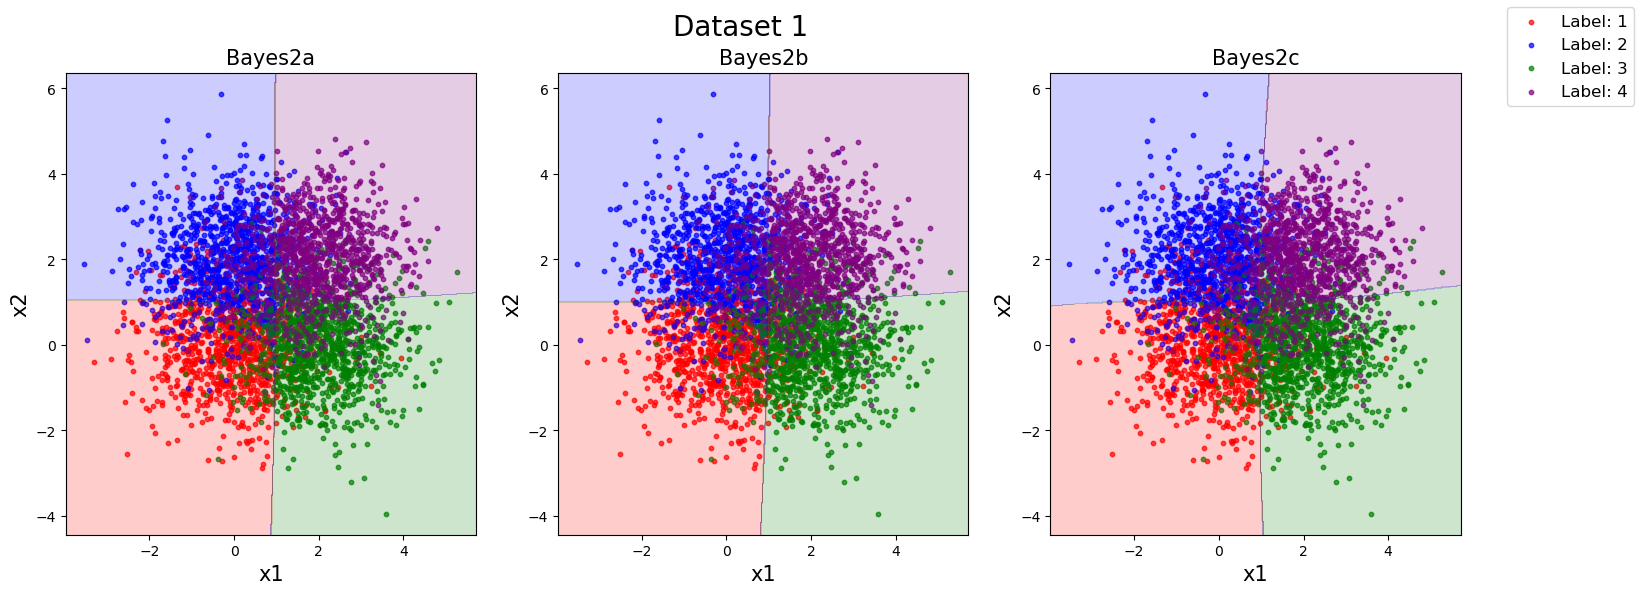

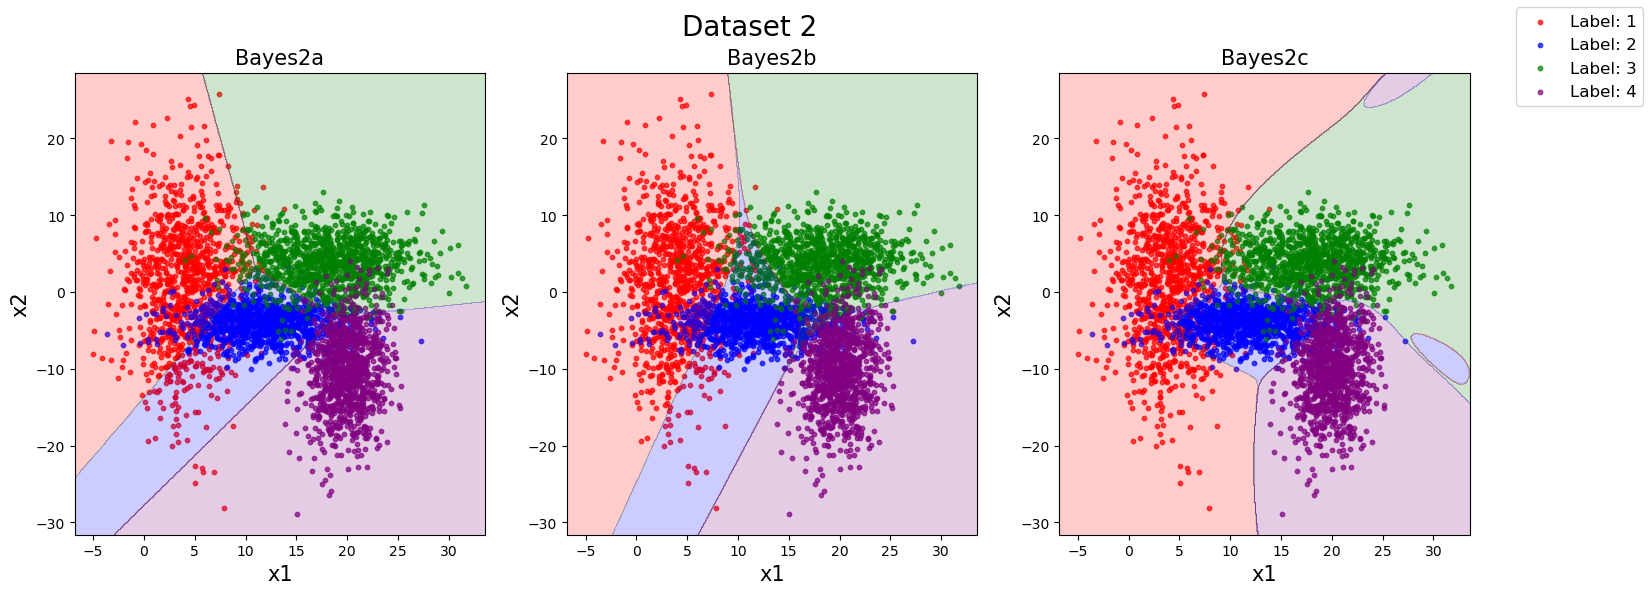

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

dataset2 = [0, 0]
# Load datasets
dataset2[0] = np.load("Datasets/dataset2_1.npz")
dataset2[1] = np.load("Datasets/dataset2_2.npz")
L = np.array([np.array([0, 1, 2, 3]), np.array([1, 0, 1, 2]), np.array([2, 1, 0, 1]), np.array([3, 2, 1, 0])])
for i in range(2):
    X_train = dataset2[i]['arr_0']
    Y_train = dataset2[i]['arr_1']
    X_test = dataset2[i]['arr_2']
    Y_test = dataset2[i]['arr_3']
    Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
    Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
    Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

    X_training = [0, 0, 0, 0]
    c = ["red", "blue", "green", "purple"]
    for j in range(4):
        X_training[j] = X_train[Y_train==(j+1)]

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,6))
    line = [0, 0, 0, 0]
    for j in range(4): # scatter plots for the training data points
        line[j] = ax1.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=10, alpha=0.7)
        ax2.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=10, alpha=0.7)
        ax3.scatter(x=X_training[j][:,0], y=X_training[j][:,1], c=c[j], s=10, alpha=0.7)
    x_min, x_max = ax1.get_xlim()
    y_min, y_max = ax1.get_ylim()
    ax1.set_xlabel(xlabel="x1", fontsize=15)
    ax1.set_ylabel(ylabel="x2", fontsize=15)
    ax2.set_xlabel(xlabel="x1", fontsize=15)
    ax2.set_ylabel(ylabel="x2", fontsize=15)
    ax3.set_xlabel(xlabel="x1", fontsize=15)
    ax3.set_ylabel(ylabel="x2", fontsize=15)

    X,Y = np.meshgrid(np.linspace(x_min,x_max,500), np.linspace(y_min,y_max,500))
    X_bg = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    # background color by approximating the classifier over the scatter plot area

    Z = Bayes2a(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax1.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Purple"], alpha=0.2)

    Z = Bayes2b(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax2.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Purple"], alpha=0.2)

    Z = Bayes2c(X_train, Y_train, X_bg)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    ax3.contourf(X, Y, Z, colors=["Red", "Green", "Blue", "Purple"], alpha=0.2)
    ax1.set_title(label="Bayes2a", fontsize=15)
    ax2.set_title(label="Bayes2b", fontsize=15)
    ax3.set_title(label="Bayes2c", fontsize=15)
    plt.suptitle(t="Dataset " + str(i+1), fontsize=20)
    fig.legend(handles=line, labels=["Label: 1", "Label: 2", "Label: 3", "Label: 4"], fontsize=12)
    plt.show()


** Cell type : TextWrite ** 
(Write your observations and table of errors here)

## Observations:

The classifiers 2a, 2b and 2c have trends similar to 1a, 1b and 1c, with 2c being more powerful to create decision boundaries that are more non-linear than 2a and 2b. This difference is not as significant in the first dataset, in which they all perform more or less the same, but is striking in dataset 2.

Classifiers 2a and 2b have trouble especially in classifying blue (class 3) points, for which they are forced to make a broader region, whereas classifier 2c fits a curve around the approximate region, leading to lesser misclassifications.

## Expected loss:

| Dataset\Classifier | 2a | 2b | 2c |
| :-: | :-: | :-: | :-: |
| <b>1</b> | 0.42975 | 0.429 | 0.42775 |
| <b>2</b> | 0.1835 | 0.1895 | 0.14075 |

## Confusion matrices:

### Dataset 1

#### Classifier 2a

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 633 | 97 | 86 | 15 |
| <b>2</b> | 219 | 738 | 49 | 136 |
| <b>3</b> | 136 | 62 | 770 | 194 |
| <b>4</b> | 12 | 103 | 95 | 655 |

#### Classifier 2b 

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 633 | 95 | 84 | 16 |
| <b>2</b> | 218 | 743 | 49 | 137 |
| <b>3</b> | 137 | 60 | 773 | 196 |
| <b>4</b> | 12 | 102 | 94 | 651 |

#### Classifier 2c

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 634 | 99 | 87 | 15 |
| <b>2</b> | 217 | 742 | 47 | 134 |
| <b>3</b> | 138 | 61 | 772 | 201 |
| <b>4</b> | 11 | 98 | 94 | 650 |

### Dataset 2

#### Classifier 2a

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 830 | 93 | 30 | 0 |
| <b>2</b> | 150 | 784 | 61 | 23 |
| <b>3</b> | 18 | 46 | 905 | 78 |
| <b>4</b> | 2 | 77 | 4 | 899 |

#### Classifier 2b 

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 891 | 119 | 23 | 0 |
| <b>2</b> | 106 | 691 | 106 | 5 |
| <b>3</b> | 3 | 124 | 864 | 102 |
| <b>4</b> | 0 | 66 | 7 | 893 |

#### Classifier 2c

| Predicted\True | 1 | 2 | 3 | 4 |
| :-: | :-: | :-: | :-: | :-: |
| <b>1</b> | 901 | 64 | 19 | 0 |
| <b>2</b> | 80 | 824 | 31 | 36 |
| <b>3</b> | 19 | 46 | 936 | 48 |
| <b>4</b> | 0 | 66 | 14 | 916 |

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07
Bias = 0.23490952754408834
Variance = 0.003923242001988918
MSE = 0.05910572813297571


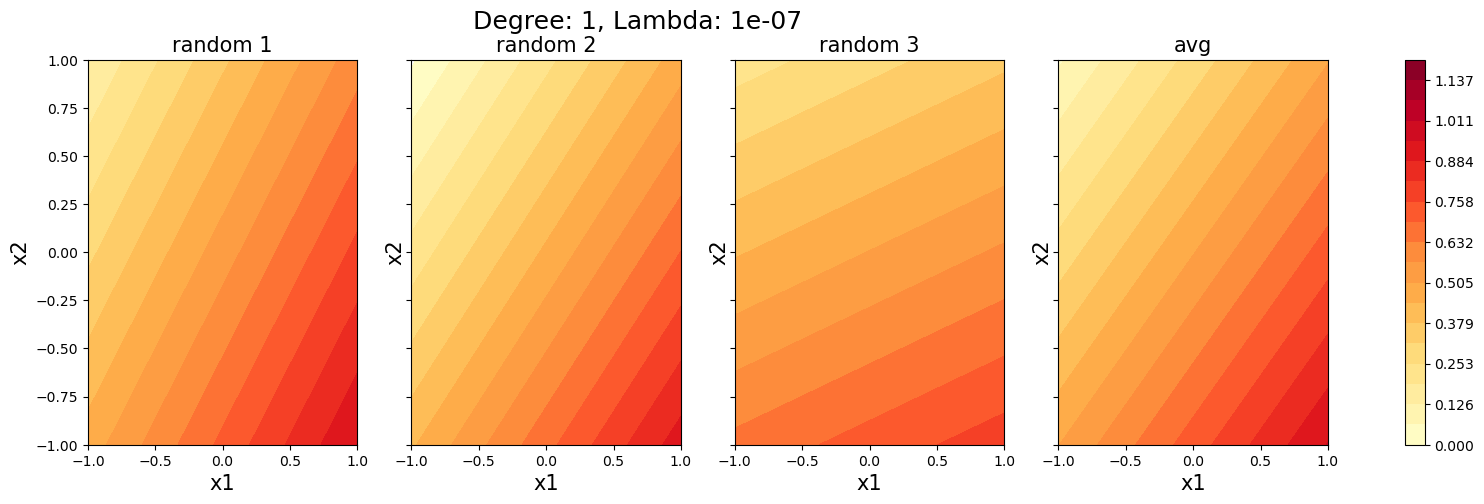

Degree= 1 lambda= 1e-05
Bias = 0.23492077835122213
Variance = 0.0036688937548221496
MSE = 0.05885666585596619


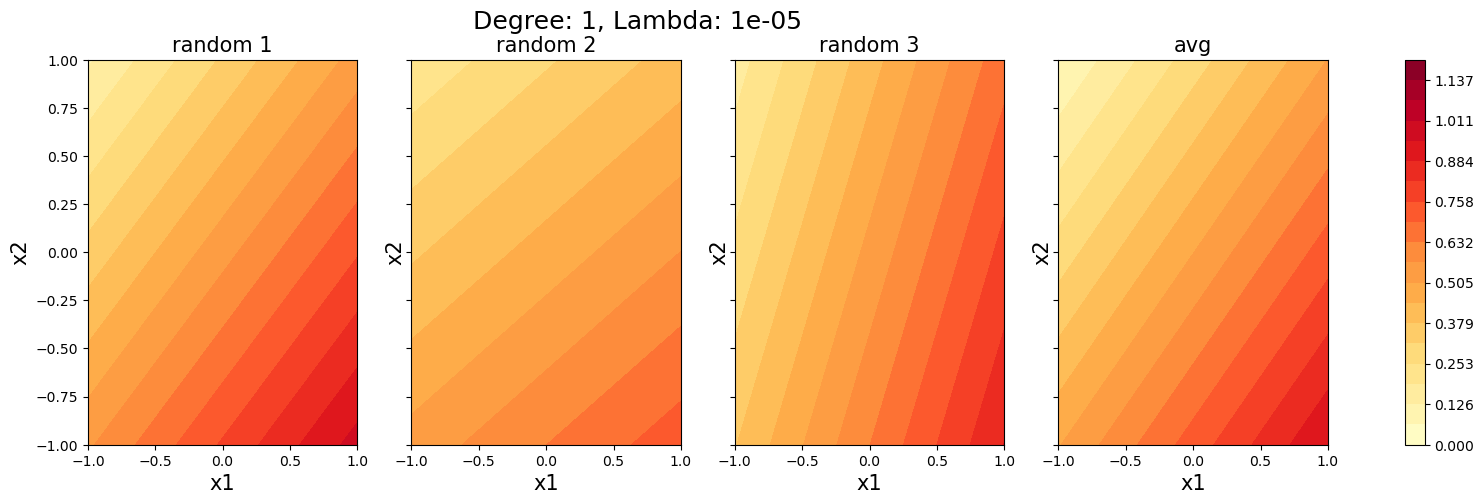

Degree= 1 lambda= 0.001
Bias = 0.23495108513859336
Variance = 0.0042205888501896036
MSE = 0.05942260125799215


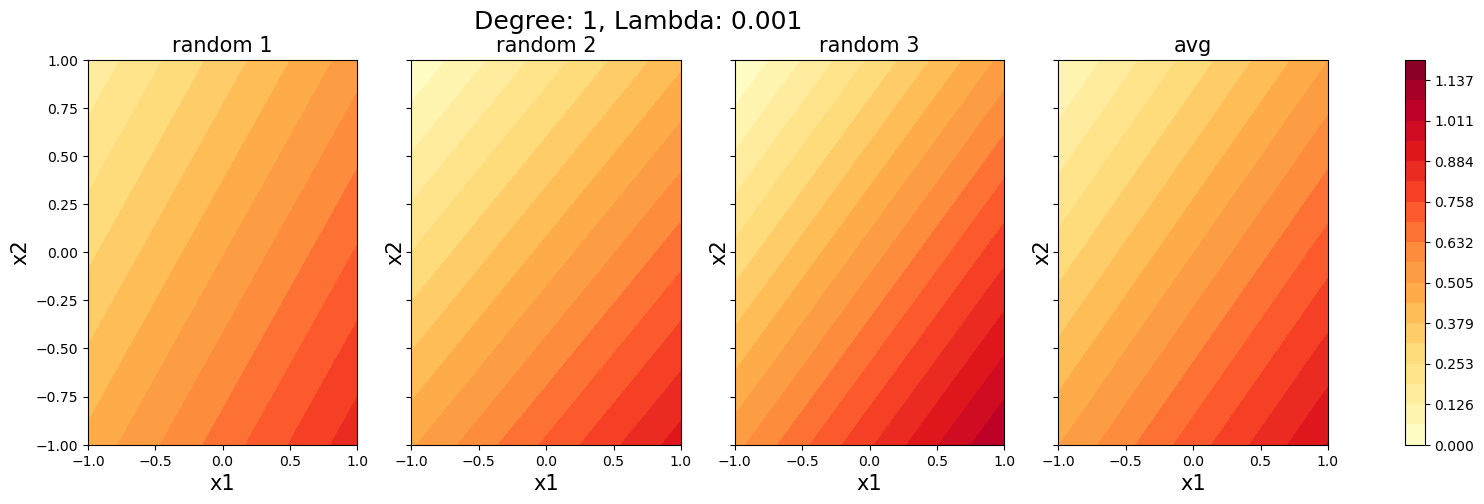

Degree= 1 lambda= 0.1
Bias = 0.23529378578675902
Variance = 0.0037543526857261285
MSE = 0.05911751831559138


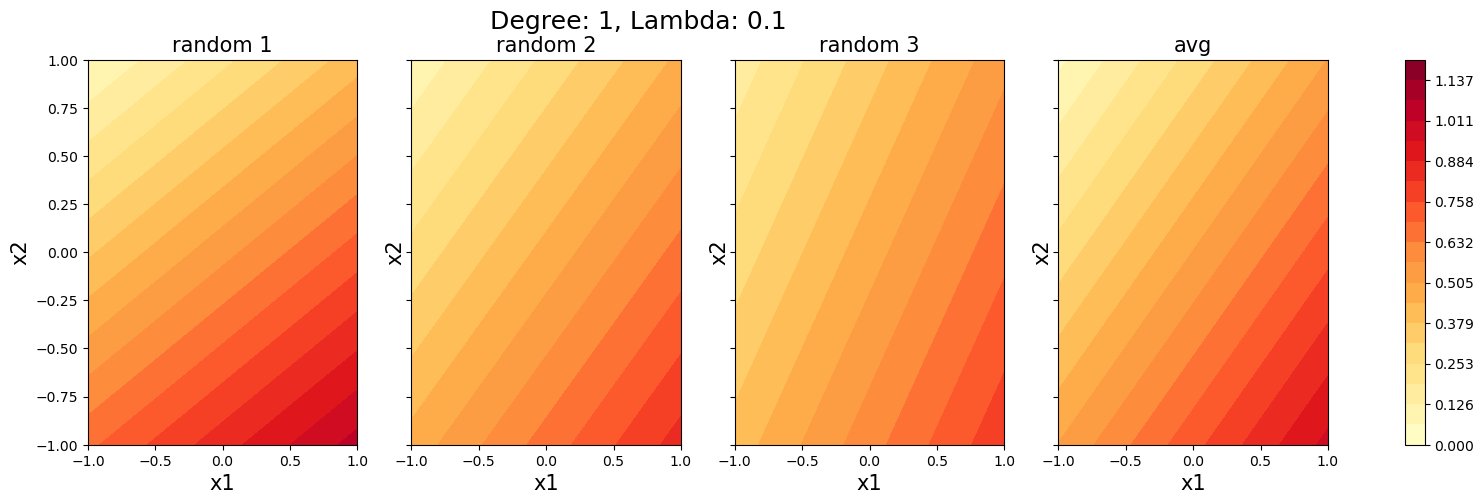

Degree= 1 lambda= 10.0
Bias = 0.2561246691461382
Variance = 0.0015129981085755765
MSE = 0.06711284425379432


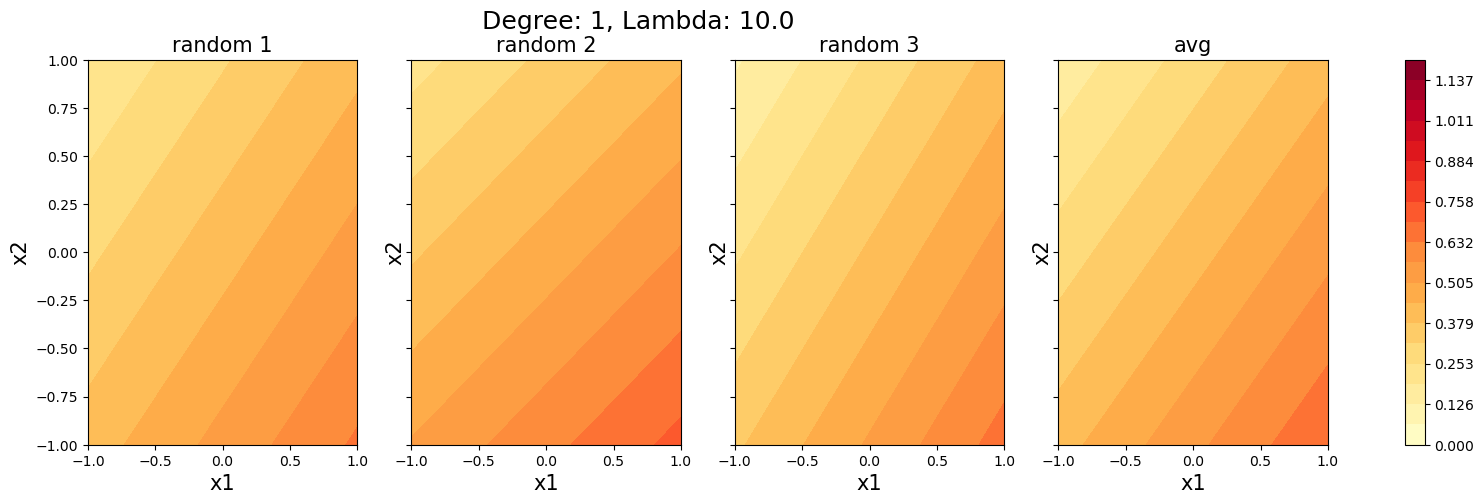

Degree= 1 lambda= 1000.0
Bias = 0.5543604560332779
Variance = 5.372396081146303e-06
MSE = 0.307320887609505


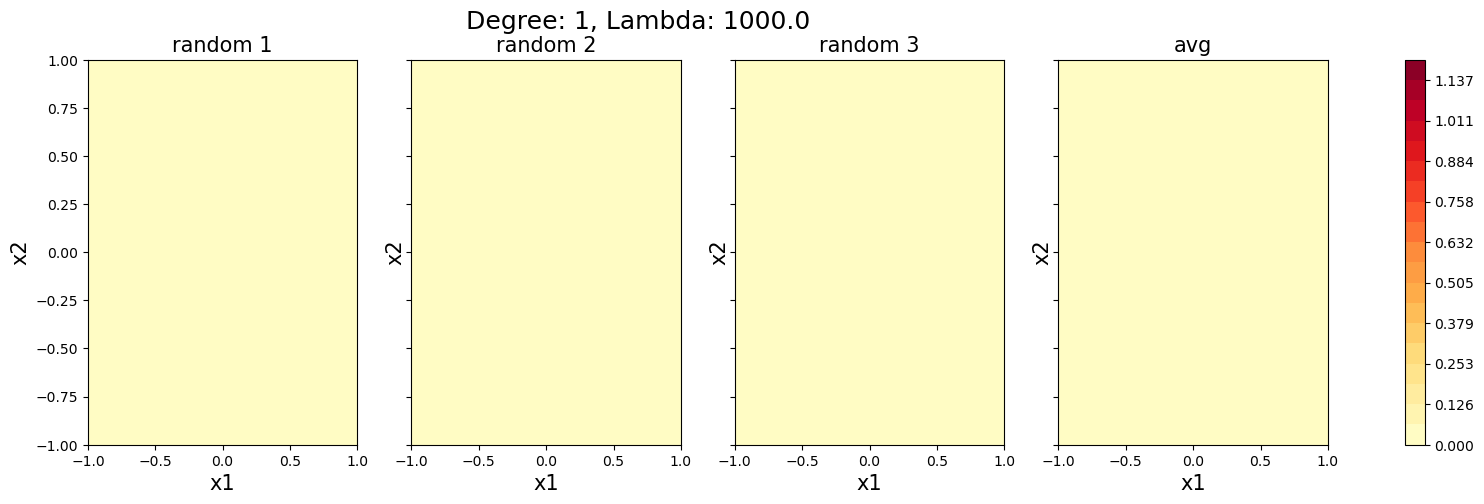

Degree= 2 lambda= 1e-07
Bias = 0.18715669474753374
Variance = 0.006161526821887201
MSE = 0.04118915521070872


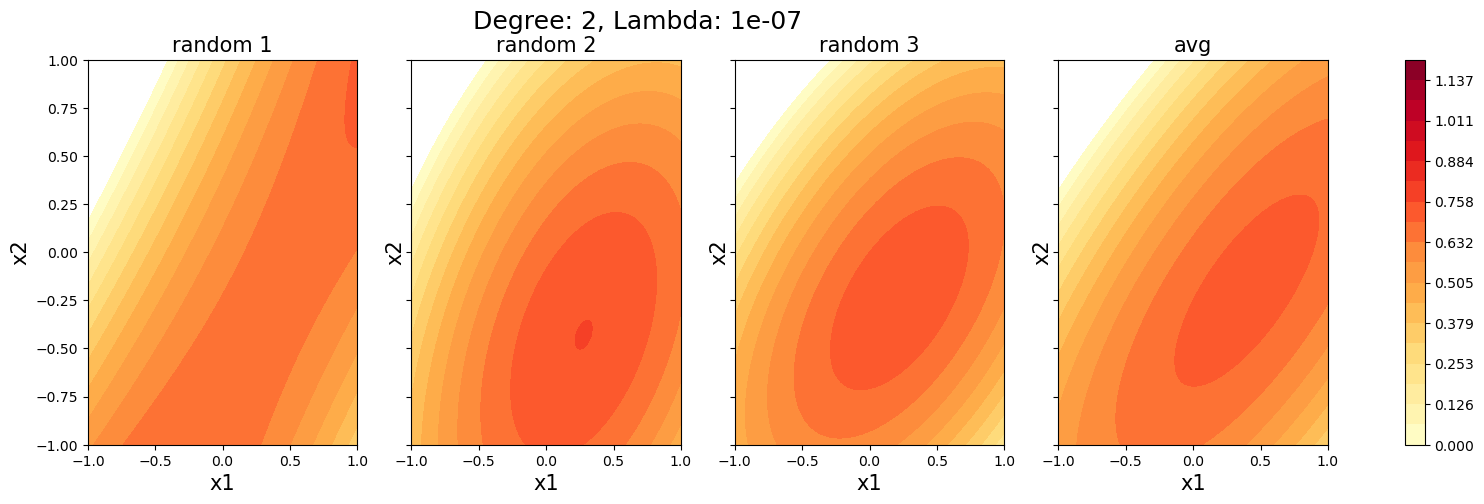

Degree= 2 lambda= 1e-05
Bias = 0.1872900518106352
Variance = 0.00651046475793695
MSE = 0.041588028265167366


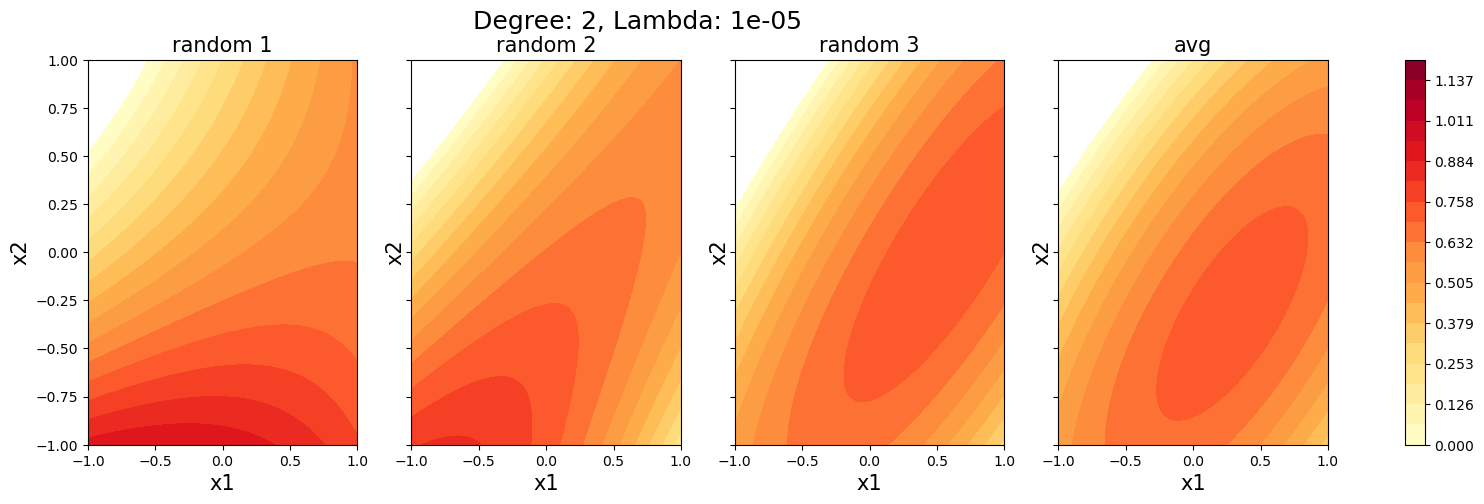

Degree= 2 lambda= 0.001
Bias = 0.18688920147865512
Variance = 0.005658666076683694
MSE = 0.04058623970601304


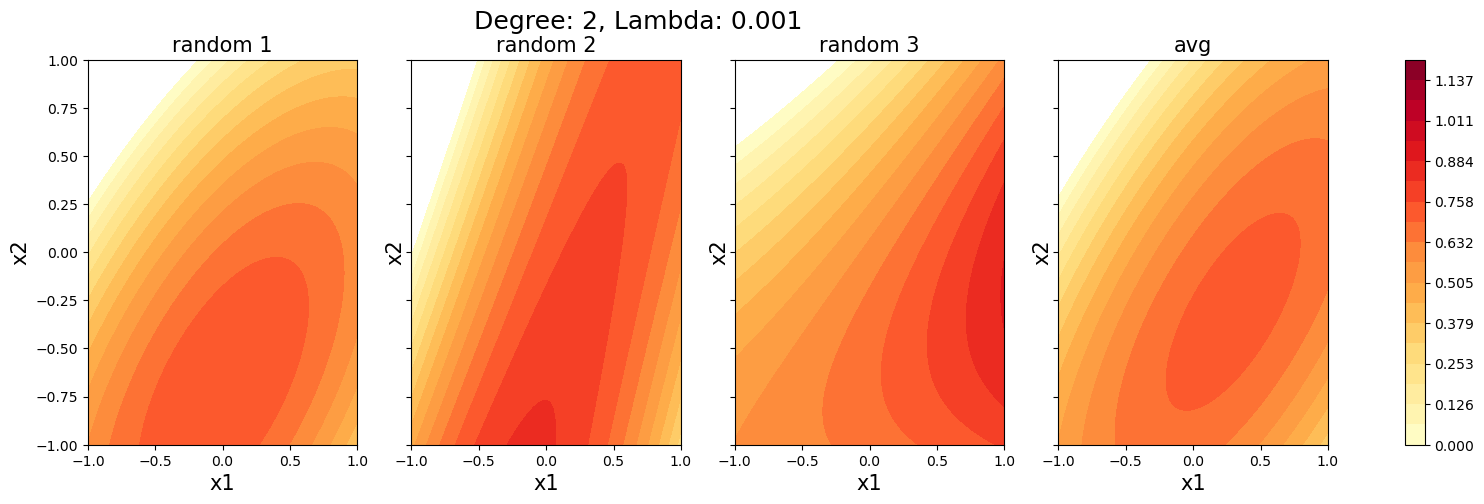

Degree= 2 lambda= 0.1
Bias = 0.1872035595450769
Variance = 0.006175141036368098
MSE = 0.04122031374271525


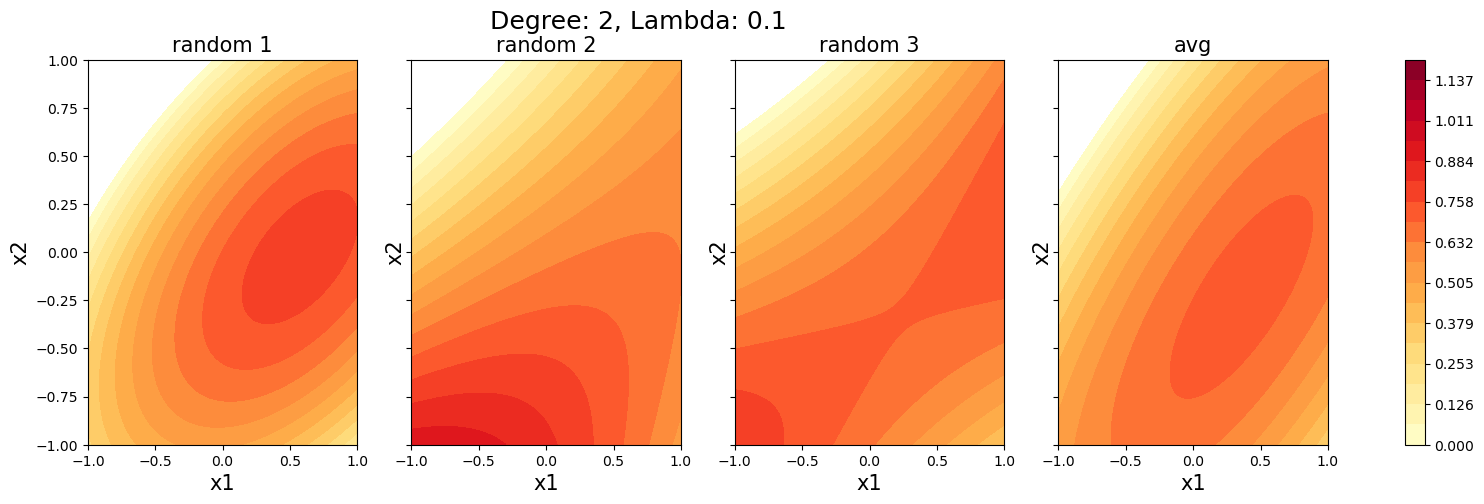

Degree= 2 lambda= 10.0
Bias = 0.24964549127362506
Variance = 0.001961492248824801
MSE = 0.06428436356207441


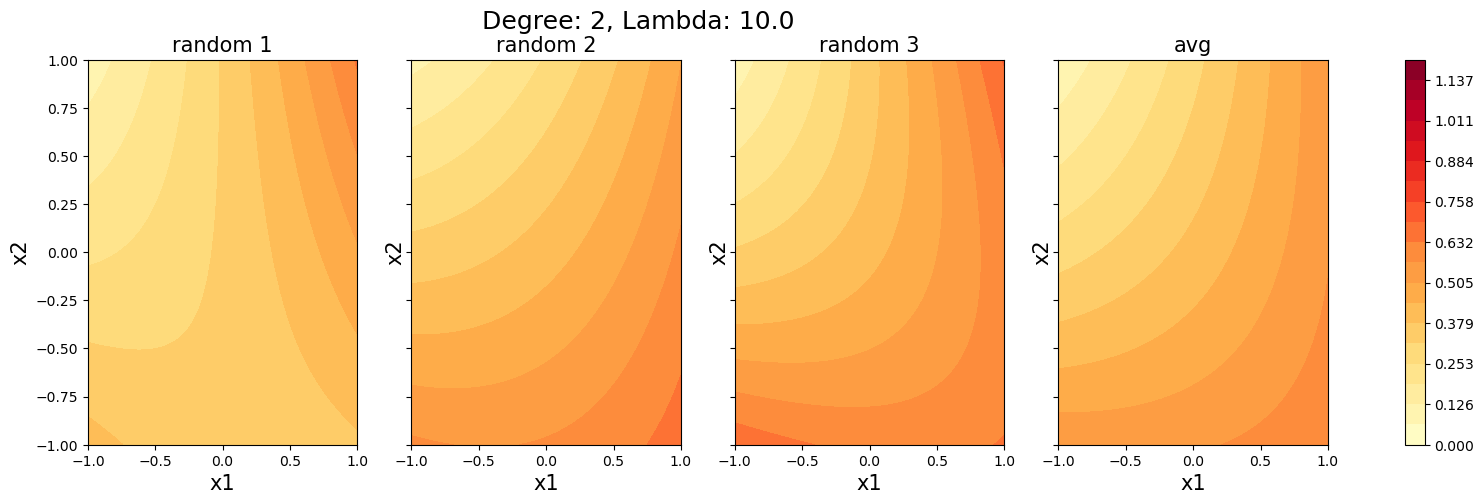

Degree= 2 lambda= 1000.0
Bias = 0.5517395789189349
Variance = 8.057745022730287e-06
MSE = 0.3044246206906663


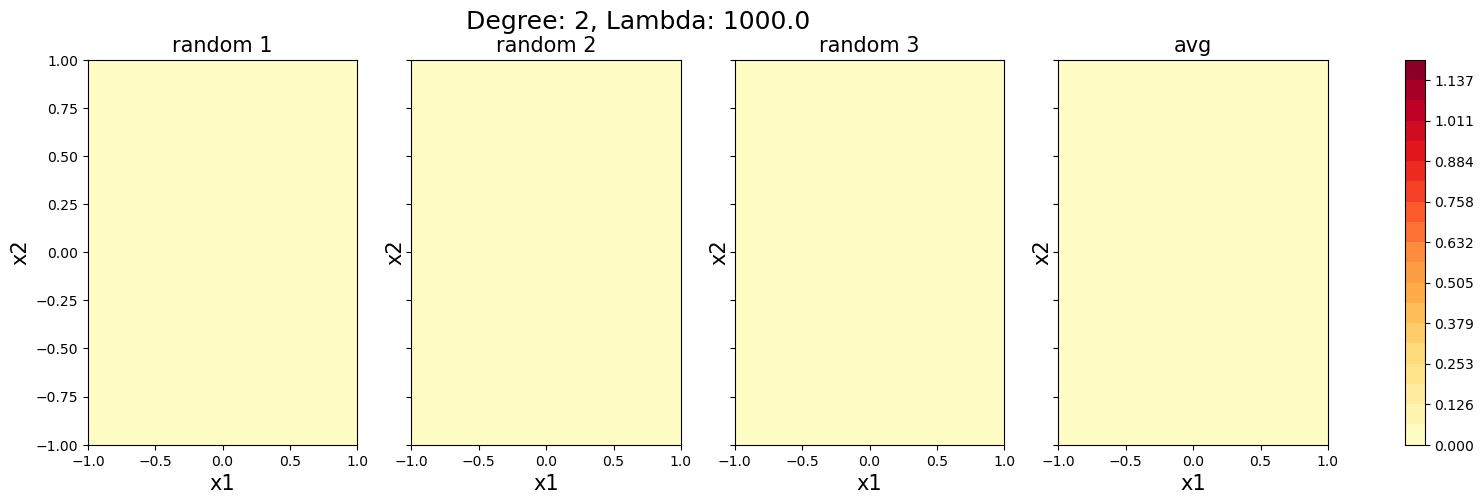

Degree= 4 lambda= 1e-07
Bias = 0.08917819864532663
Variance = 0.007316340147017264
MSE = 0.0152690912606426


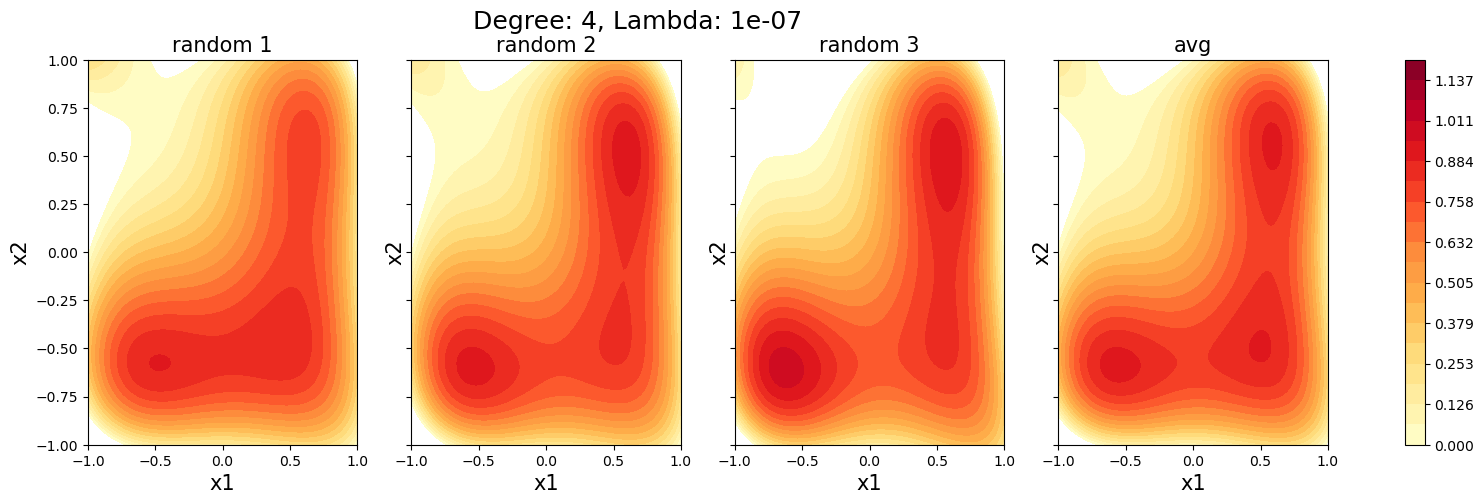

Degree= 4 lambda= 1e-05
Bias = 0.09074150760057154
Variance = 0.008362751863911198
MSE = 0.01659677306553578


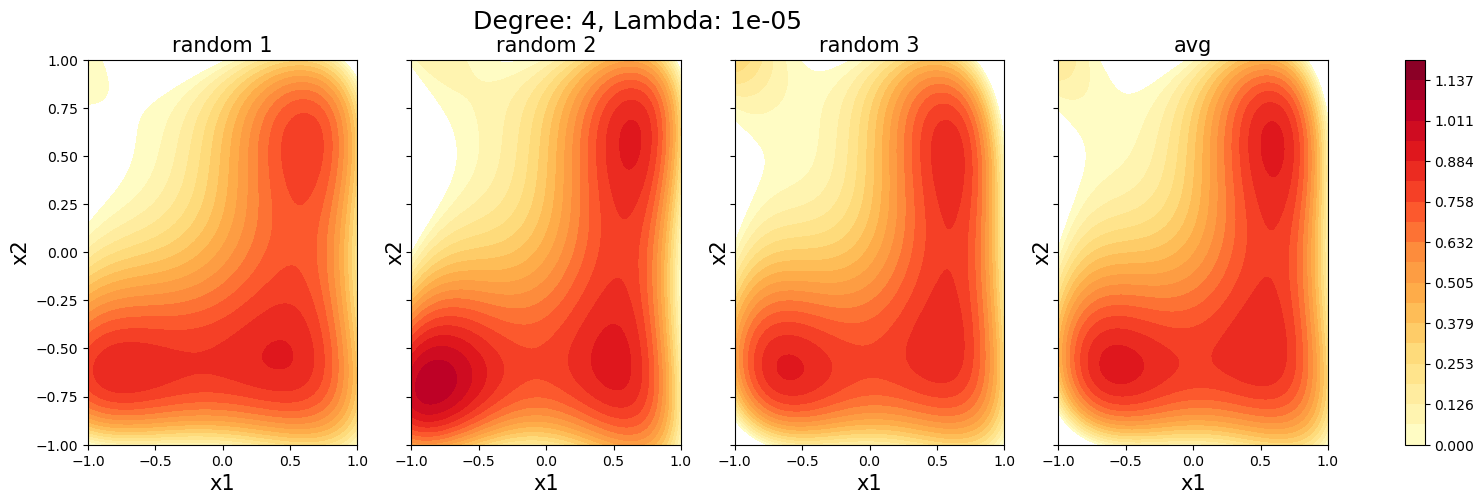

Degree= 4 lambda= 0.001
Bias = 0.08808769815507961
Variance = 0.008912981691534445
MSE = 0.01667242425779486


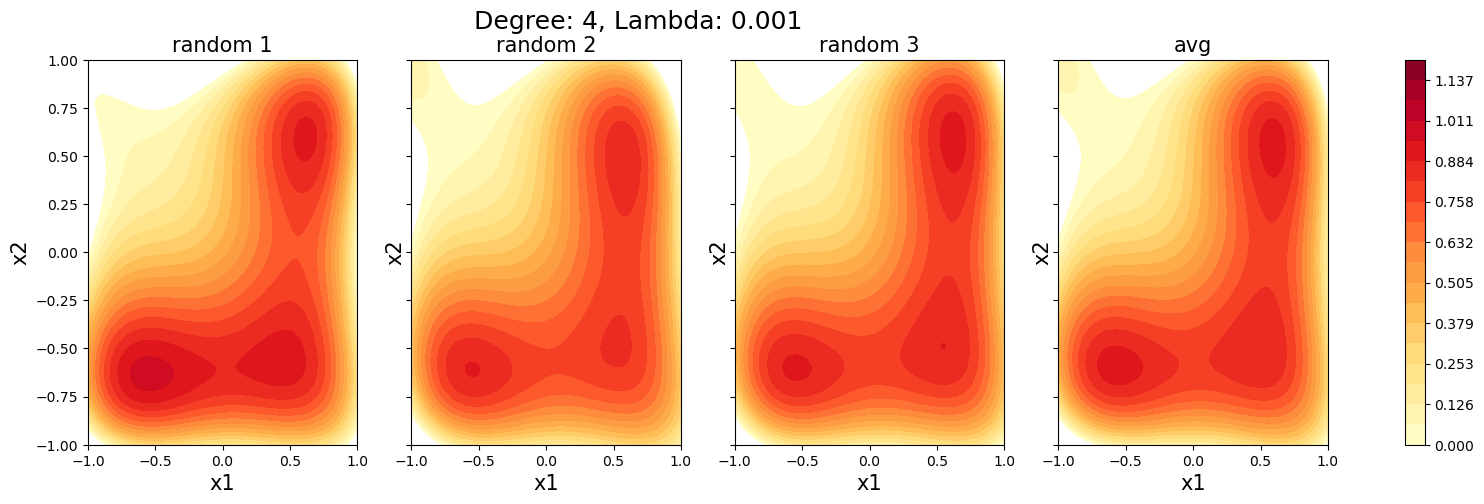

Degree= 4 lambda= 0.1
Bias = 0.09603382943297478
Variance = 0.004789583733116022
MSE = 0.014012080128677714


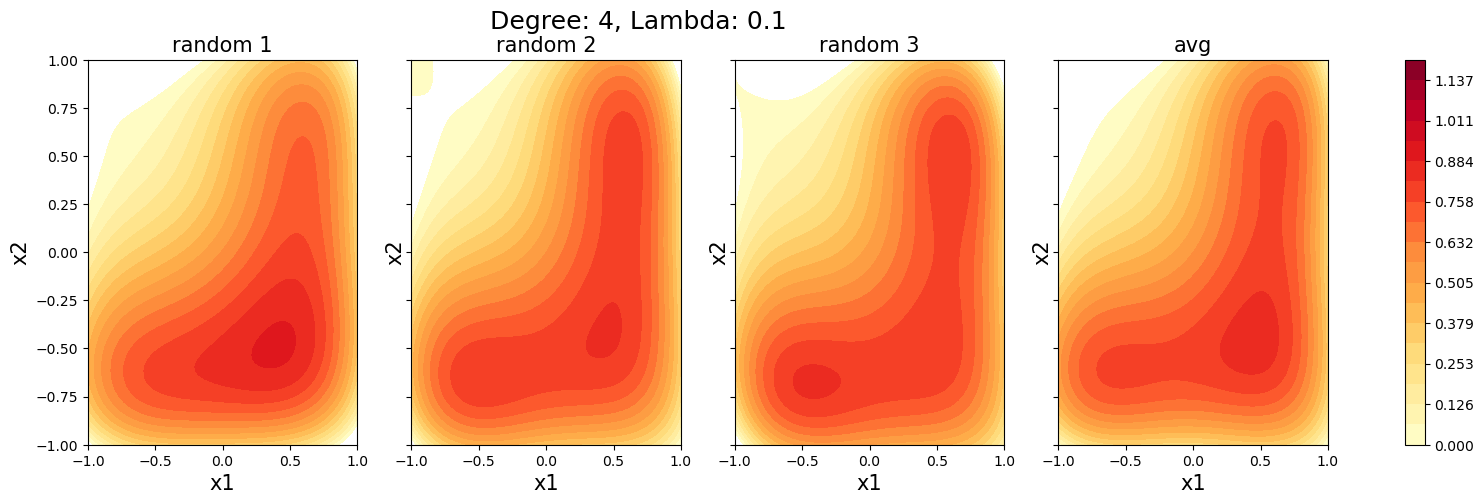

Degree= 4 lambda= 10.0
Bias = 0.24344747388559262
Variance = 0.0021438191579486172
MSE = 0.061410491699224926


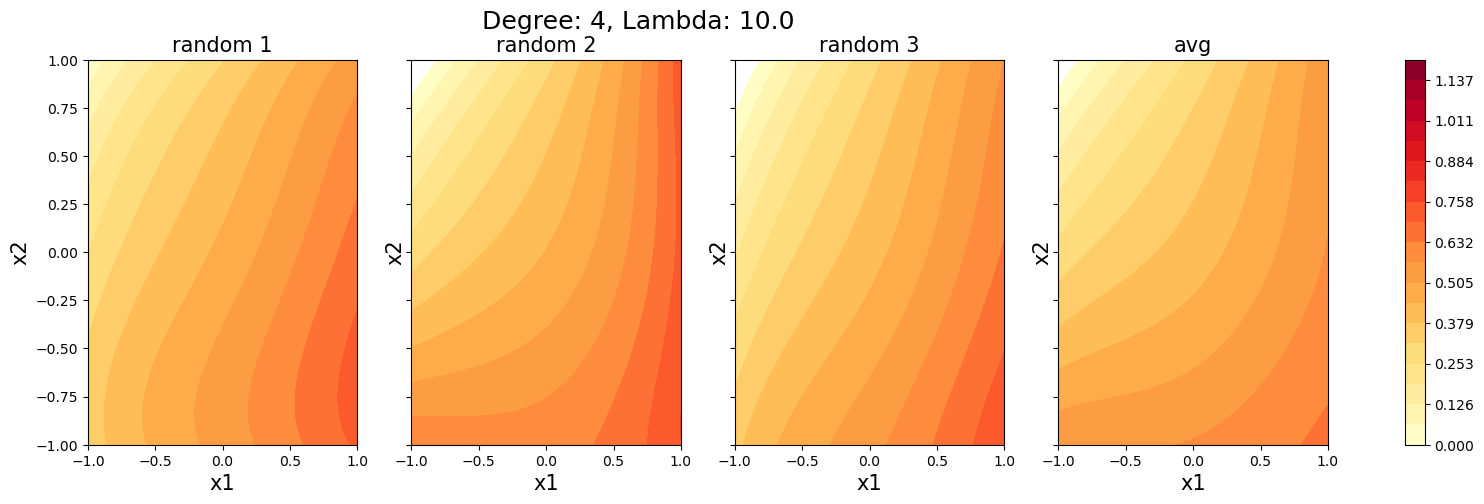

Degree= 4 lambda= 1000.0
Bias = 0.5502859036147671
Variance = 8.97514745055557e-06
MSE = 0.3028235508645714


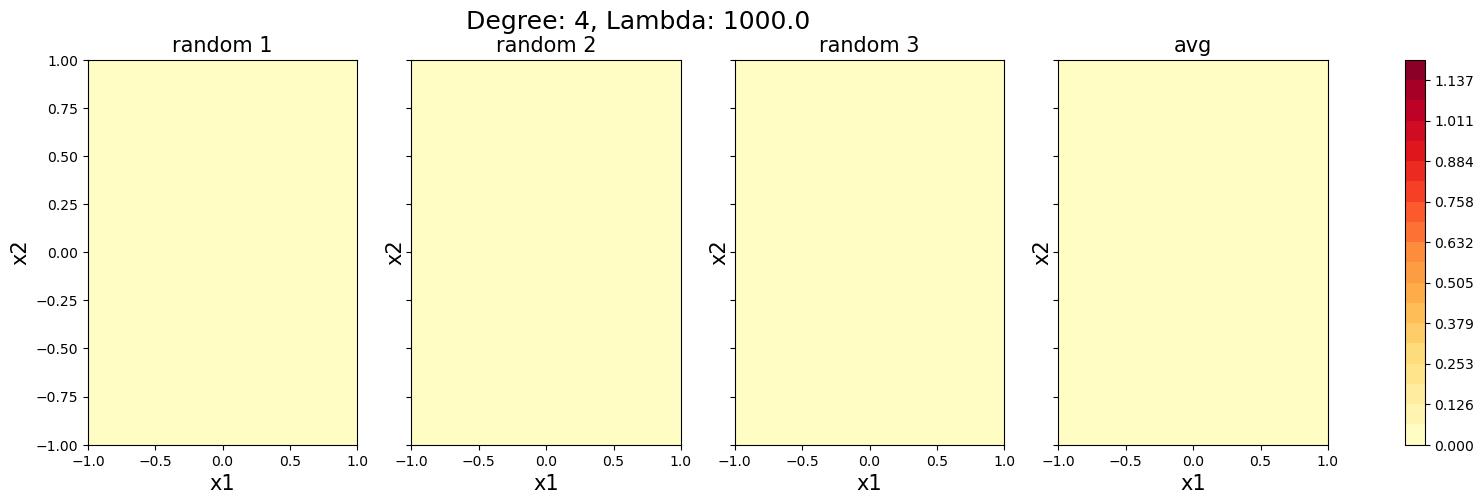

Degree= 8 lambda= 1e-07
Bias = 0.11980663596976528
Variance = 0.2107375214842235
MSE = 0.22509115150661535


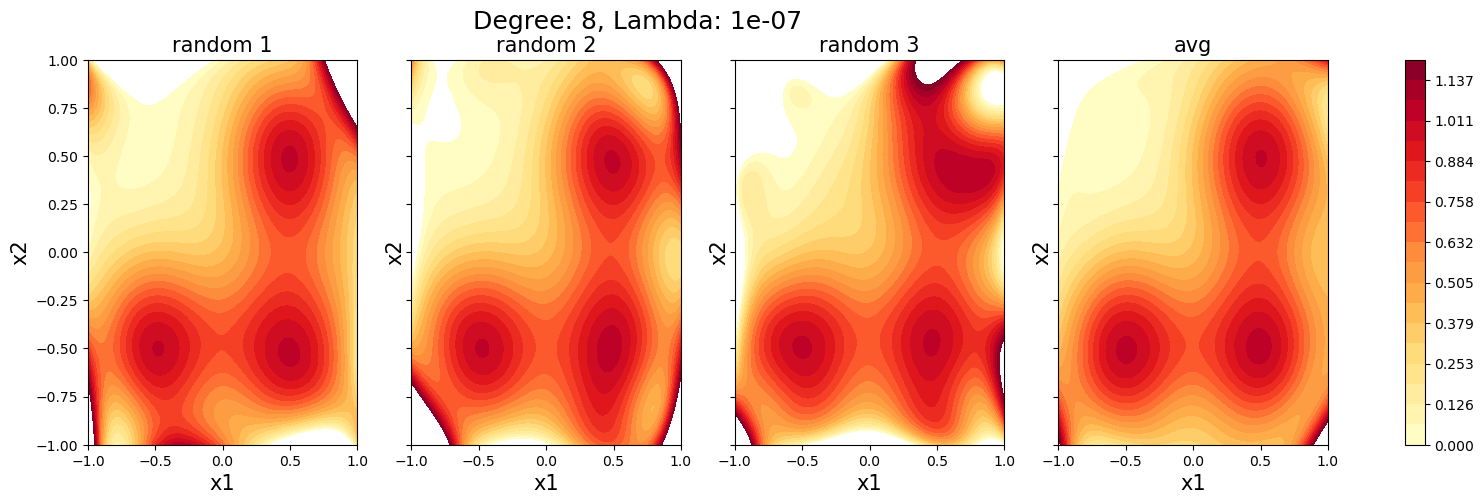

Degree= 8 lambda= 1e-05
Bias = 0.04930513186446131
Variance = 0.04830829492754557
MSE = 0.05073929095571749


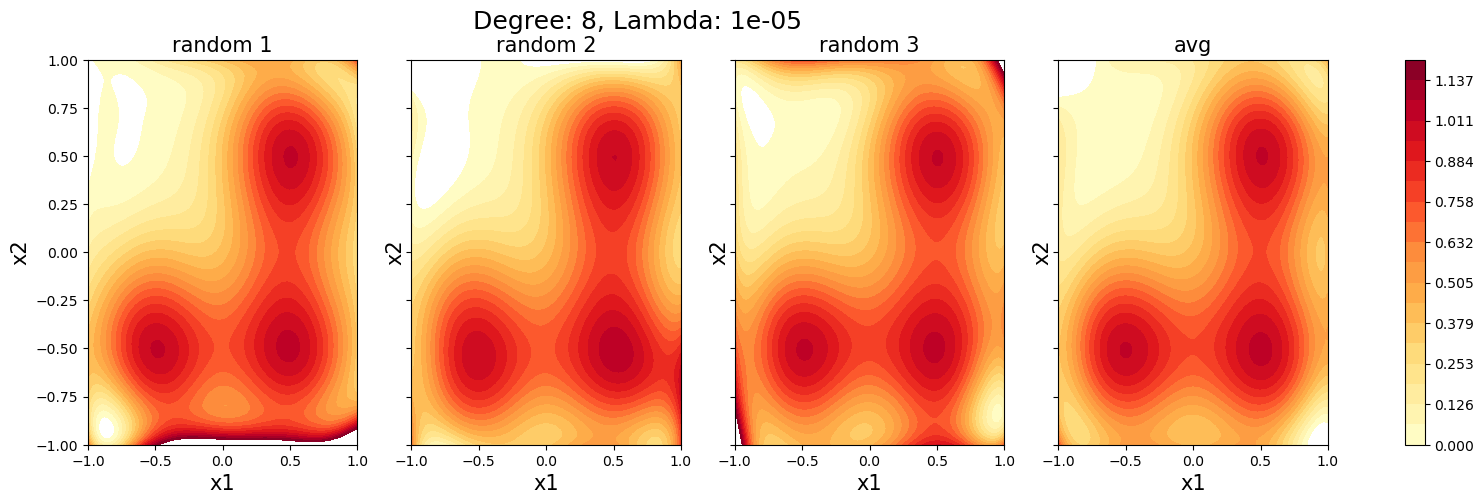

Degree= 8 lambda= 0.001
Bias = 0.06431625806250947
Variance = 0.01823876755425274
MSE = 0.022375348605416054


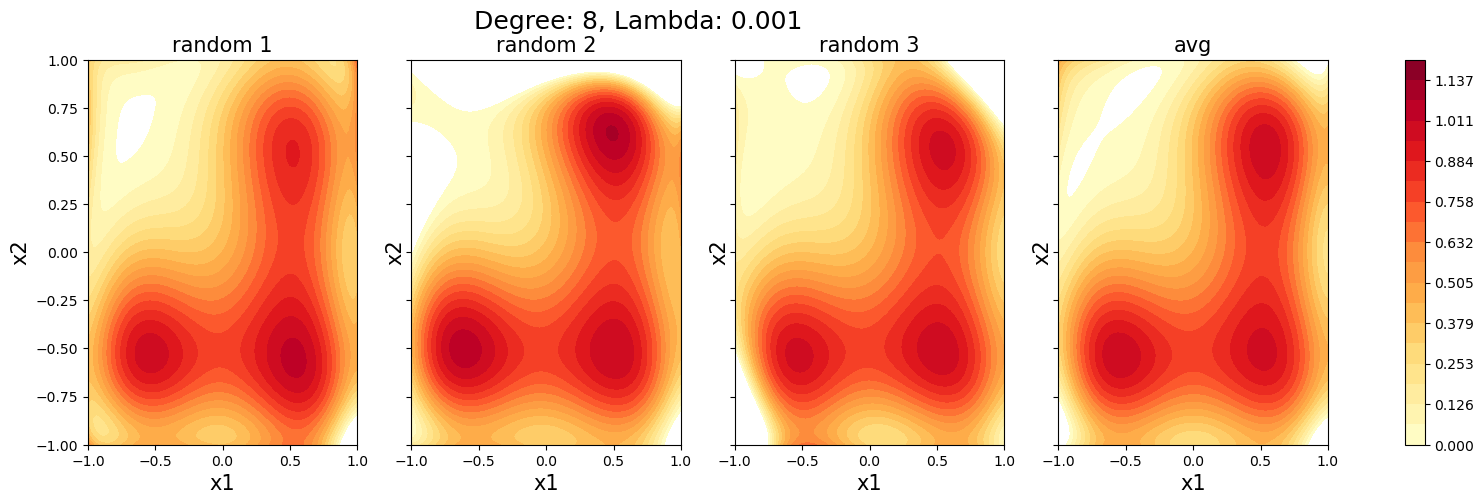

Degree= 8 lambda= 0.1
Bias = 0.10043636146634412
Variance = 0.0075092735519207855
MSE = 0.01759673625651892


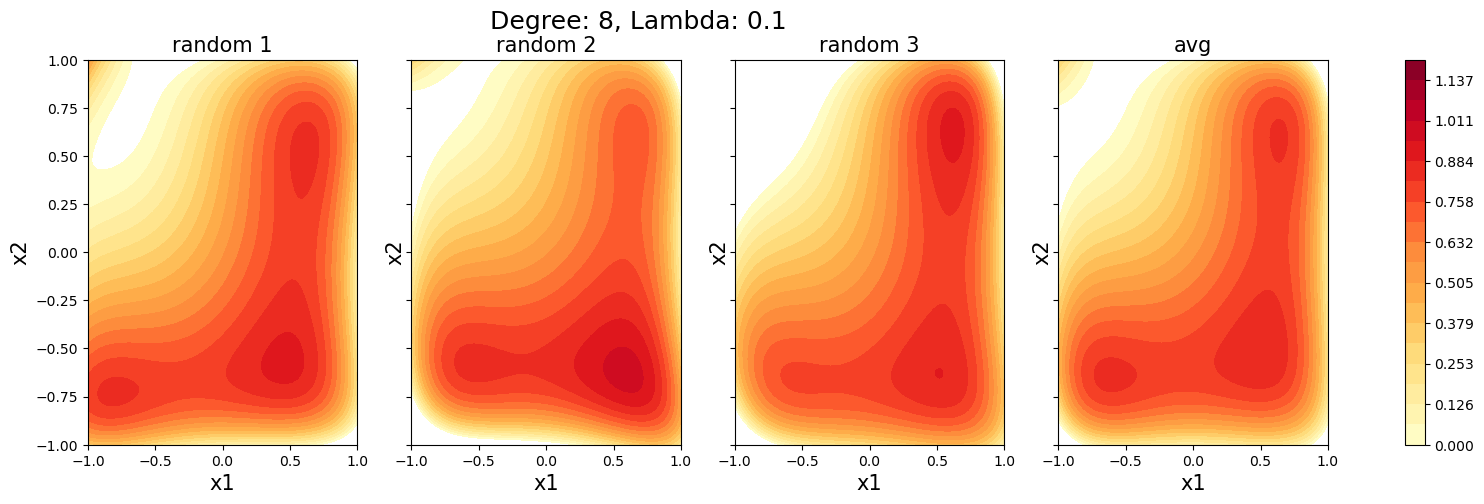

Degree= 8 lambda= 10.0
Bias = 0.23581964545843043
Variance = 0.002588227040009592
MSE = 0.058199132224149415


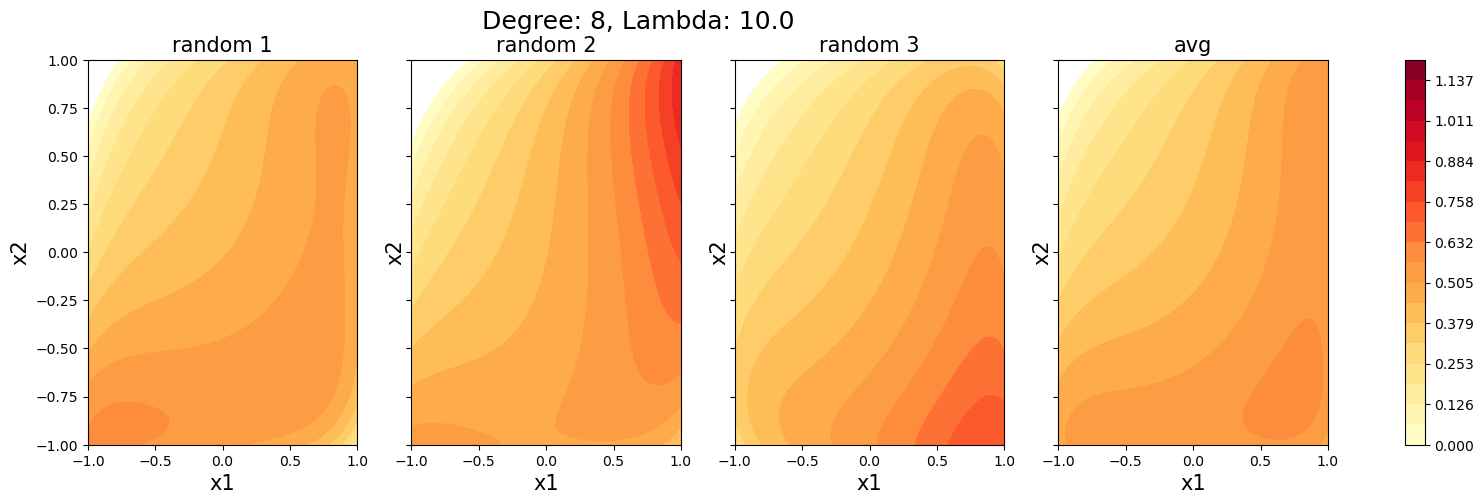

Degree= 8 lambda= 1000.0
Bias = 0.548831373482261
Variance = 1.4167538202771704e-05
MSE = 0.3012300440566278


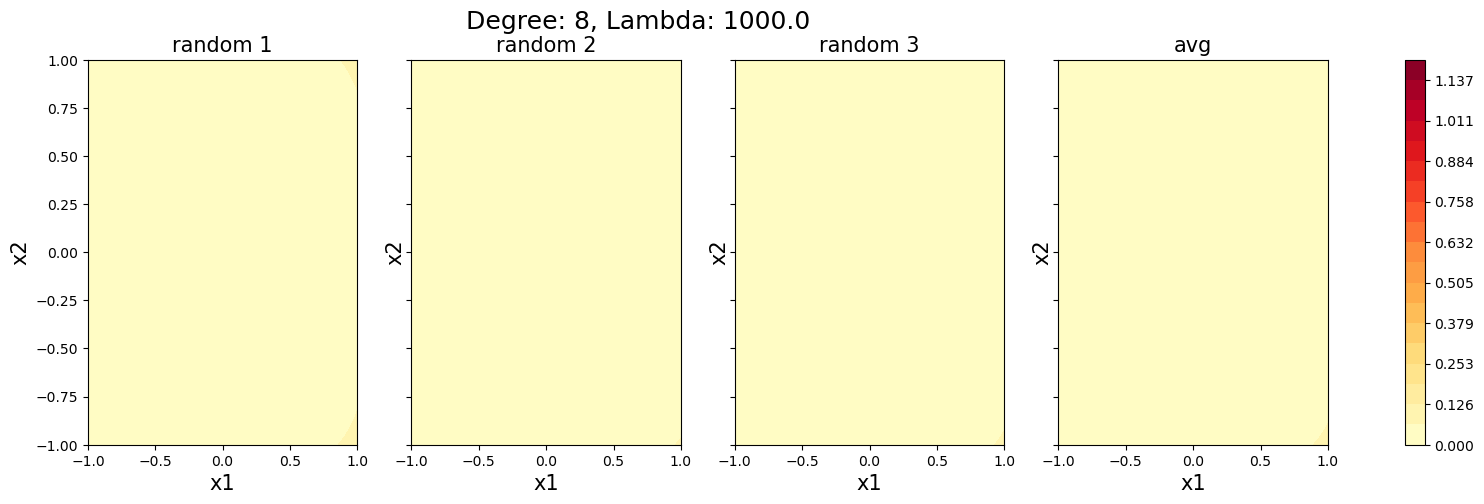

Degree= 16 lambda= 1e-07
Bias = 0.16074337100116687
Variance = 0.4231292540663727
MSE = 0.44896768538719145


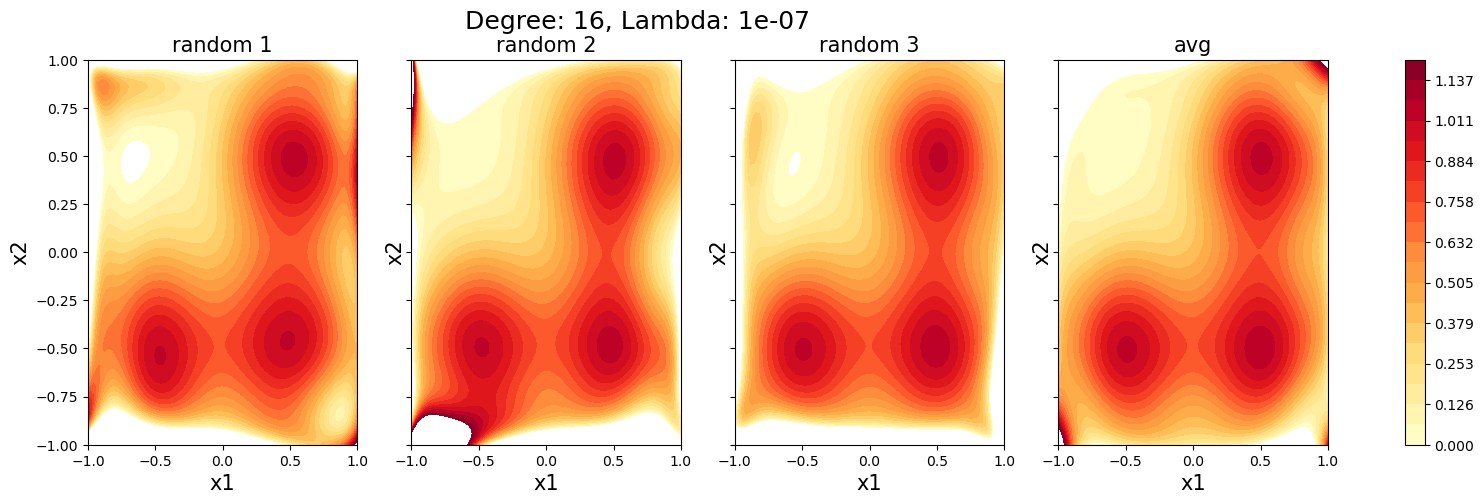

Degree= 16 lambda= 1e-05
Bias = 0.12213157248676862
Variance = 0.15223744336877376
MSE = 0.16715356436686457


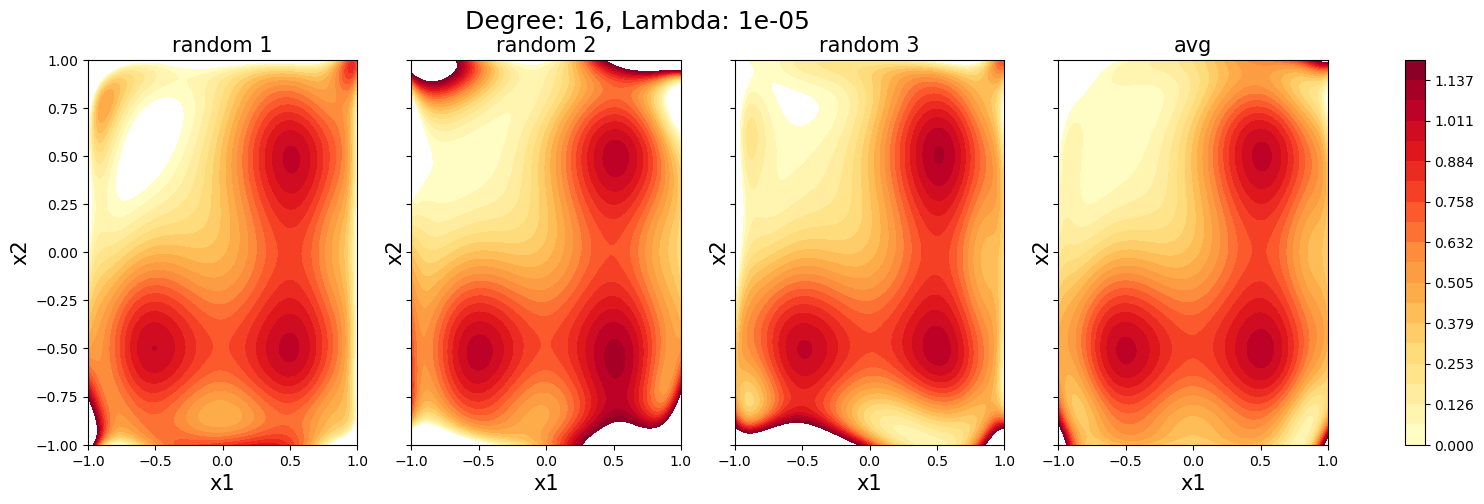

Degree= 16 lambda= 0.001
Bias = 0.0839999571384824
Variance = 0.06117043613849149
MSE = 0.06822642893775838


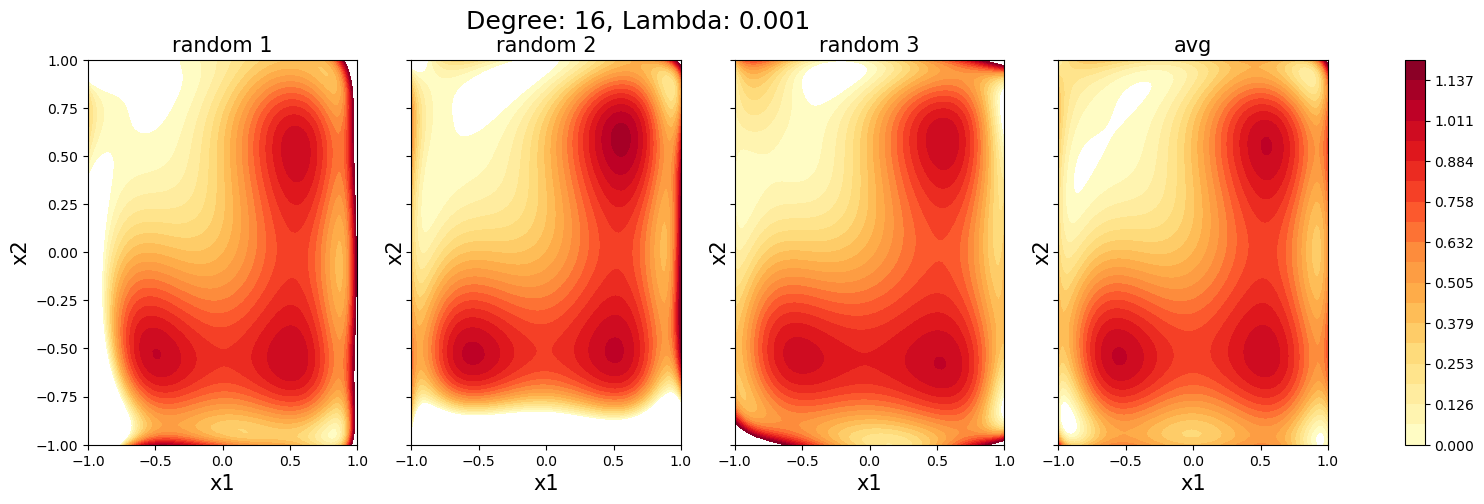

Degree= 16 lambda= 0.1
Bias = 0.11205919738353194
Variance = 0.012886553806113043
MSE = 0.025443817524354415


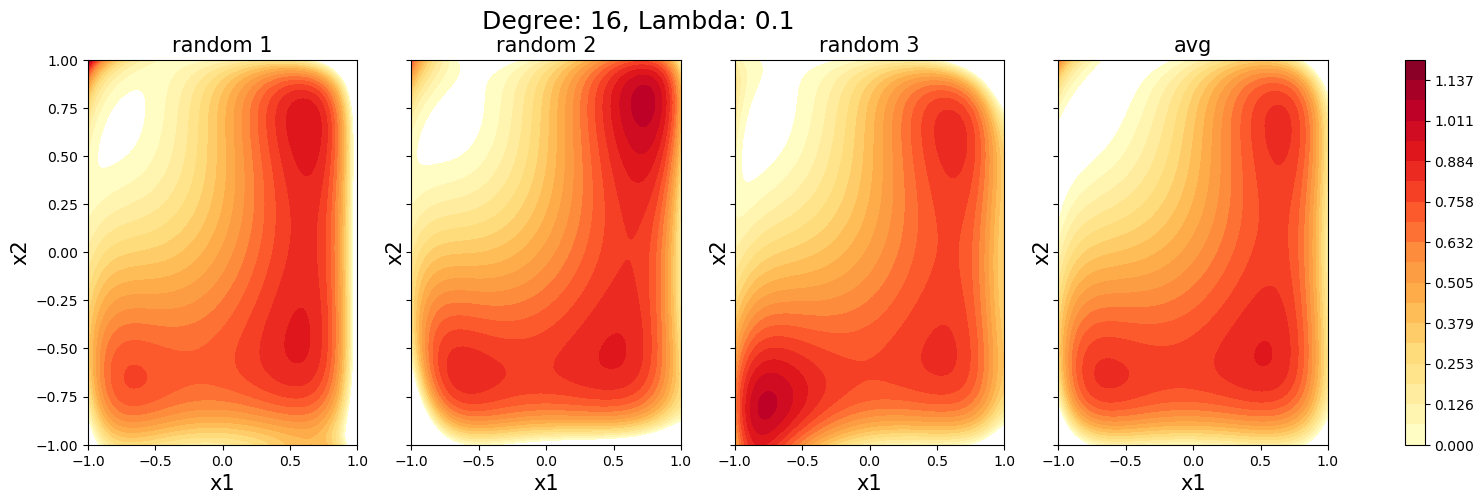

Degree= 16 lambda= 10.0
Bias = 0.22965562767612907
Variance = 0.002738387663701924
MSE = 0.05548009498701874


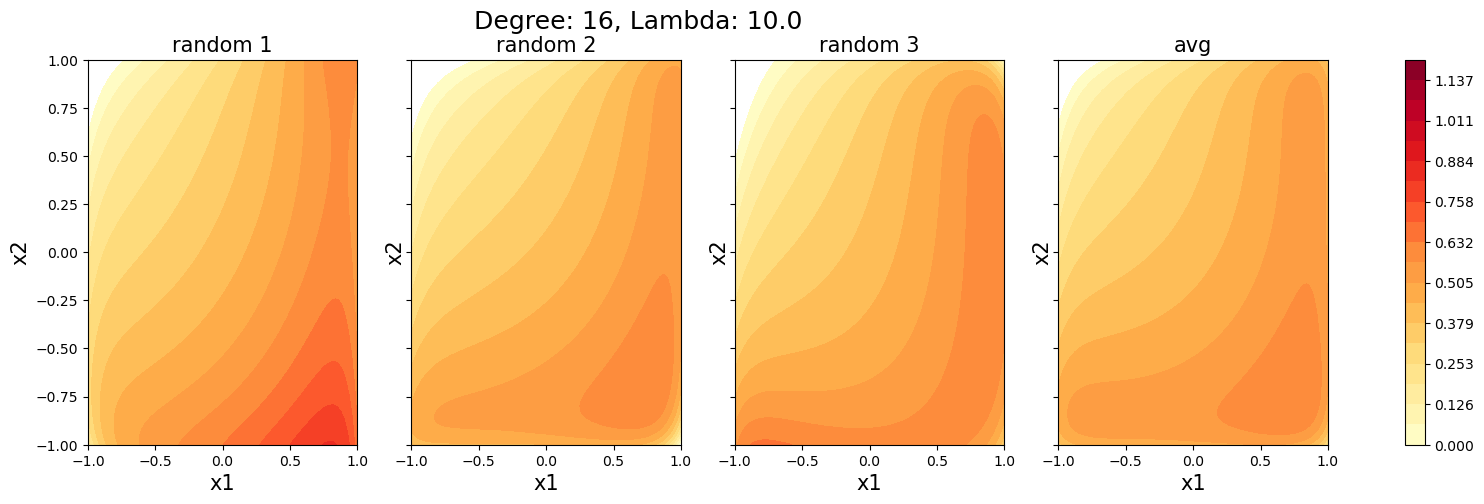

Degree= 16 lambda= 1000.0
Bias = 0.5488168069546078
Variance = 1.7152250548817693e-05
MSE = 0.3012170398464


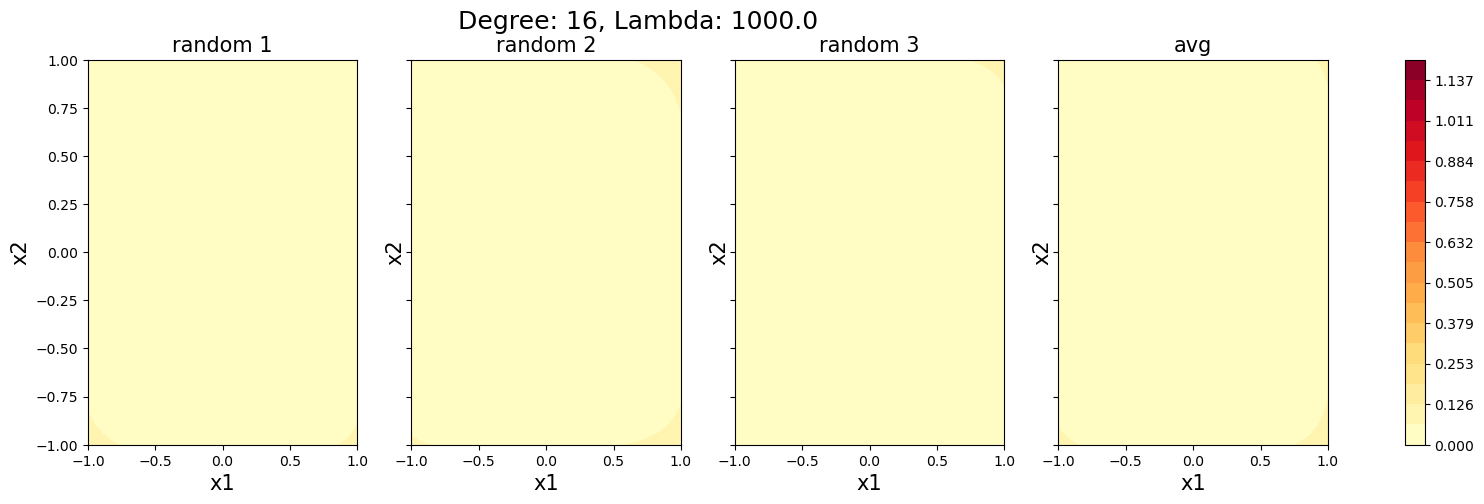

In [8]:
# Cell type : CodeWrite

def get_feature_mapping(x, degree=1):
    """
    Takes x vector and degree of feature vector as input, and generates the feature vector of specified degree as output.
    Inputs:
    x: data vector, numpy array of shape (d,)
    degree: d', integer (optional, default = 1)

    Output:
    phi: feature vector, list of size d'

    """
    
    x1 = x[0]
    x2 = x[1]
    ans = [1]
    for i in range(1, degree+1):
        ans.append(x1**i)
        ans.append(x2**i)
        for j in range(1, i):
            ans.append((x1**j)*(x2**(i-j)))
    return ans

def get_feature_matrix(X, degree=1):
    """
    Takes X matrix and degree of feature vector as input, and generates the feature matrix of specified degree as output.
    Inputs:
    X: data matrix, numpy array of shape (n, d)
    degree: d', integer (optional, default = 1)

    Output:
    Phi: feature matrix, numpy array of shape (n, d')
    
    """
    
    n = X.shape[0]
    phi = list(np.zeros(shape=n))
    for i in range(n):
        phi[i] = get_feature_mapping(X[i], degree)
    phi = np.array(phi)
    return phi

def get_train_value(x):
    """
    Input:
    x: data vector, numpy array of shape (d,)

    Output:
    y: y/f* value for x (float), using the function specified in the question

    """
    
    a = np.array([np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([0.5, -0.5])])
    ans = 0
    for i in range(3):
        ans += np.exp(-4*np.dot(np.subtract(x, a[i]), np.subtract(x, a[i])))
    return ans

def get_Y_train(X_train):
    """
    Input:
    X: data matrix, numpy array of shape (n, d)

    Output:
    y: label vector, containing y/f* values for all data vectors in X, a numpy array of shape (n,)

    """
    
    n = X_train.shape[0]
    Y_train = np.zeros(n)
    for i in range(n):
        Y_train[i] = get_train_value(X_train[i])
    return Y_train

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """

    n = X_test.shape[0]
    d = X_test.shape[1]
    phi = get_feature_matrix(X_test, degree)
    return np.matmul(phi, wt_vector)

    
    
def visualise_polynomial_2d(wt_vector, degree, ax, title=""): # ax was added as an argument for convenience
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions

    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')

    contour = ax.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20),cmap='YlOrRd')
    ax.set_title(label=title, fontsize=15)
    ax.set_xlabel(xlabel="x1", fontsize=15)
    ax.set_ylabel(ylabel="x2", fontsize=15)
    return contour
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    phi = get_feature_matrix(X_train, degree)
    return np.matmul(np.transpose(phi), np.matmul(np.linalg.inv(np.add(np.matmul(phi, np.transpose(phi)), reg_param * np.identity(n=n))), Y_train))


    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    wt_vectors = list(np.zeros(shape=100))
    for i in range(100):
        # Generate 100 random samples and obtain ws for all of them
        X1_train = np.random.uniform(low=-1, high=1, size=num_training_samples)
        X2_train = np.random.uniform(low=-1, high=1, size=num_training_samples)
        X_train = np.transpose(np.array([X1_train, X2_train]))
        Y_train = get_Y_train(X_train)
        wt_vectors[i] = polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True, figsize=(20,5))
    visualise_polynomial_2d(wt_vectors[0], degree, ax1, "random 1")
    visualise_polynomial_2d(wt_vectors[50], degree, ax2, "random 2")
    visualise_polynomial_2d(wt_vectors[99], degree, ax3, "random 3")
    wt_vector_avg = np.mean(wt_vectors, axis=0)
    contour = visualise_polynomial_2d(wt_vector_avg, degree, ax4, "avg")

    plt.suptitle("Degree: "+str(degree)+", Lambda: "+str(reg_param), fontsize=18, x=0.4)
    plt.colorbar(contour, ax=[ax1, ax2, ax3, ax4])

    # Bias**2 = E_x[(g-f*)**2]
    # Var = E_sE_x[(fs-g)**2]
    # MSE = Bias**2 + Var
    # f* -> actual, g -> avg, fs -> current

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_test = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    # Bias calculation
    g_x = polynomial_regression_ridge_pred(X_test, wt_vector_avg, degree)
    y_x = get_Y_train(X_test)
    sq_diff = np.subtract(g_x, y_x)**2
    bias_sq = np.mean(sq_diff)

    # Variance calculation
    var_arr = np.zeros(shape=100)
    for i in range(100):
        fs_x = polynomial_regression_ridge_pred(X_test, wt_vectors[i], degree)
        sq_diff = np.subtract(fs_x, g_x)**2
        var_arr[i] = np.mean(sq_diff)
    var = np.mean(var_arr)
    return (np.sqrt(bias_sq), var, bias_sq+var)


for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

        plt.show()
        

In [9]:
# Cell type: convenience


** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

<b>NOTE: All values were obtained from an earlier run and not from the final pre-submission run, and hence there will be minor changes between the above outputs and the values in the table, which is due to the random sampling.</b>

### Bias table:

<b>NOTE: The values are bias values and not bias**2</b>

| Degree\Lambda | 1e-7                | 1e-5                | 1e-3                | 1e-1                | 1e1                 | 1e3                |
| :-----------: | :-----------------: | :-----------------: | :-----------------: | :-----------------: | :-----------------: | :----------------: |
| <b>1</b>      | 0.2348924892519821  | 0.23503852353357066 | 0.23474704815526196 | 0.23489841870790393 | 0.2561171763146804  | 0.5545202854871742 |
| <b>2</b>      | 0.1870570161153684  | 0.18739727959904678 | 0.1867845602558093  | 0.1865090570034006  | 0.2478176224180198  | 0.5513724518732486 |
| <b>4</b>      | 0.08976297402268275 | 0.09265826776804773 | 0.08870481224390589 | 0.09719550129764325 | 0.24592620314697974 | 0.5500024163152023 |
| <b>8</b>      | 0.10903304931275991 | 0.06830580778428738 | 0.07184459683218818 | 0.0999726214552652  | 0.23812573545370158 | 0.549326864941338  | 
| <b>16</b>     | 0.13663914636977925 | 0.10951445717736528 | 0.07626617389799337 | 0.10855141864090409 | 0.22929856086558909 | 0.5488390759729798 |

### Variance table:

| Degree\Lambda | 1e-7                 | 1e-5                  | 1e-3                  | 1e-1                  | 1e1                   | 1e3                    |
| :-----------: | :------------------: | :-------------------: | :-------------------: | :-------------------: | :-------------------: | :--------------------: |
| <b>1</b>      | 0.004452515216769246 | 0.003897176532001778  | 0.0037785118188461793 | 0.0035142227759134242 | 0.0015944258414916667 | 7.515124675699347e-06  |
| <b>2</b>      | 0.005702691979129477 | 0.005915118264855051  | 0.0053538624218594484 | 0.005208687304784284  | 0.0018731344151711007 | 8.812955841296339e-06  |
| <b>4</b>      | 0.009942758801781833 | 0.0093058774254231    | 0.0070253706441185115 | 0.004752350277209428  | 0.0022879530733268027 | 1.0839043960552936e-05 |
| <b>8</b>      | 0.1923683308049711   | 0.04563186893810381   | 0.020260844596660534  | 0.0076498146869606876 | 0.002424035632881029  | 1.4758202861521697e-05 | 
| <b>16</b>     | 0.38261516408952345  | 0.1583298032829421    | 0.062479171966121475  | 0.014564507687769214  | 0.0031137577968033663 | 1.8107314978632584e-05 |

### Summary:

Bias increases as degree decreases and as $\lambda$ increases. </br>
Variance increases as degree increases and as $\lambda$ decreases. </br>
The true exponential nature is modelled better by higher degree points due to the infinite series expansion, but also overfits for low $\lambda$ due to the small sample size. For $\lambda = 1000$, all plots are virtually empty as the large $\lambda$ forces $w$ to nearly zero.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




Training set size:  50
Training set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.2503831240658675	0.25038312406572727	0.25038312406574026	0.25038312419627545	0.2503844155180828	0.25589782969635694	
2		0.13411159812197213	0.13411159812134169	0.13411159812242812	0.1341116089798747	0.13421305918294474	0.1974826992879742	
4		0.10201831452799265	0.10201831452661934	0.10201831464463723	0.10201945605437712	0.10410664921246371	0.18063792530763298	
8		0.00013273273937580818	0.00019915711672317447	0.010765781158537617	0.041721344555995916	0.08199099254870269	0.16319970182567986	
16		1.9565631814698562e-08	9.367001060202221e-06	0.0013176931543960073	0.031113092536478676	0.07002070549491671	0.1500128602707264	
Test set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.3012668386651218	0.3012668173294287	0.3012667744406005	0.30126249638196617	0.30083822424918816	0.2783506938903703	
2		0.15790003266687222	0.1578999882318238	0.15789985172183796	0.157

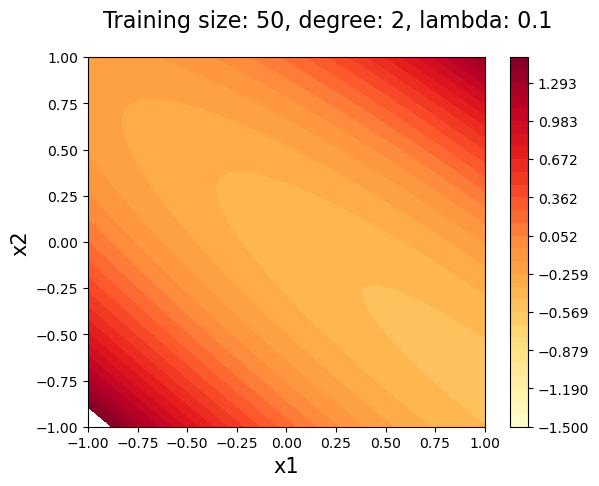

Training set size:  100
Training set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.2580910133402605	0.25809101333931384	0.2580910133393146	0.25809101334983686	0.25809111800124085	0.25873987508331553	
2		0.1309506275090611	0.13095062750764658	0.13095062750780448	0.1309506290910284	0.1309660877087941	0.16496776073260552	
4		0.11302663784416828	0.11302663784179307	0.11302663785305089	0.11302674963672642	0.11365141158303721	0.15237348873650713	
8		0.04158792642045383	0.041587937516277075	0.04168003942637112	0.05800846639789686	0.09290160568698454	0.14488569592362951	
16		7.734495223208589e-06	0.00048396690114663665	0.007544023924202816	0.04172918471042625	0.08369694254931276	0.1395438378020544	
Test set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.27314861545861685	0.27314863724659677	0.273148631206466	0.27314797902048754	0.27308304030498226	0.26862153976765146	
2		0.15320986429443623	0.15320993151783638	0.15320989967210705	0.153206781

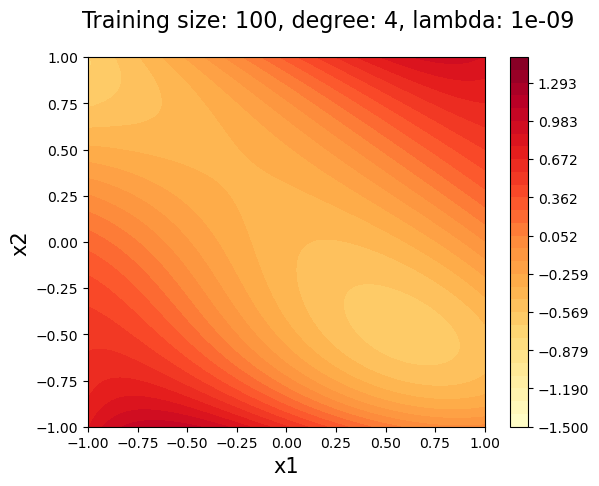

Training set size:  200
Training set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.2465350744803551	0.24653507447805376	0.2465350744780527	0.2465350744794022	0.24653508793957893	0.24664115434052242	
2		0.13366532561006028	0.1336653256003588	0.1336653256003921	0.13366532593756617	0.13366866006096548	0.14754903759873955	
4		0.11333815612164141	0.11333815608726933	0.11333815609035075	0.11333818685601951	0.11358989298188121	0.14444440429596625	
8		0.061737322312378405	0.061737322385246325	0.061738100909675735	0.06394973229162126	0.09568723069707914	0.14119279224291706	
16		2.8817021598738106e-05	0.0010854317276281613	0.011325564335367749	0.0444632675032409	0.08349956671799383	0.13376259890526832	
Test set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.2676628715464535	0.26766304774963884	0.26766304861590523	0.26766287658293186	0.26764571096108264	0.2662254689671443	
2		0.14578064136958074	0.14578065249821118	0.14578064777040092	0.1457803

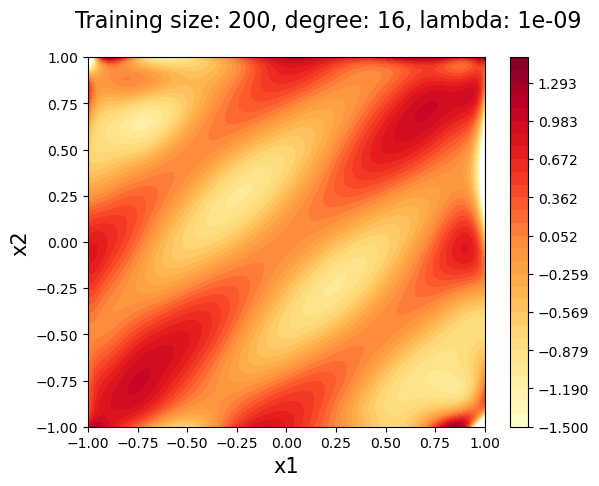

Training set size:  1000
Training set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.24072821962226318	0.24072821851814385	0.24072821851812304	0.24072821851812823	0.24072821857035245	0.24072871841517668	
2		0.1388241026502953	0.13882410254246985	0.13882410254246827	0.13882410255342378	0.1388242118754503	0.13971802344395548	
4		0.1250172426073081	0.1250172421713456	0.12501724217136287	0.1250172429930063	0.12502511583632814	0.13417202903703976	
8		0.07674285866069877	0.07674285354533959	0.07674286707499409	0.07684621641427229	0.09483803187328227	0.12843822791852463	
16		2.548771954113946e-05	0.0004451268497277537	0.006533490640802141	0.03841533988816478	0.08499257629516146	0.12168732408409076	
Test set errors:
Degree\Lambda	1e-09			1e-07			1e-05			0.001			0.1			10.0			
1		0.26253578729204535	0.26253464634892215	0.2625346502976616	0.2625346497789192	0.262534597633275	0.26253030415658635	
2		0.14242904515470142	0.14242931926969468	0.14242931988784044	0.14242944518

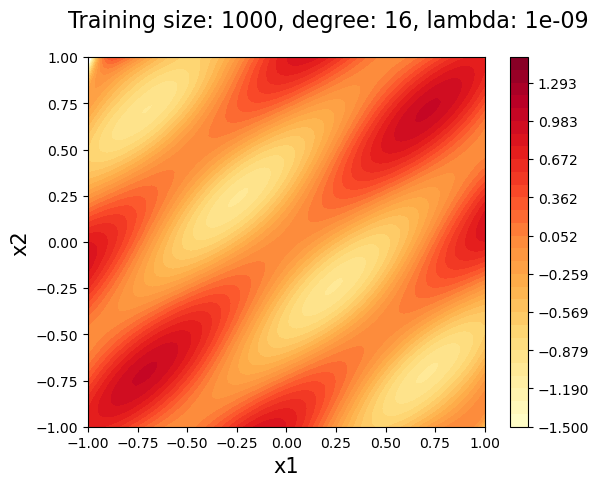

In [10]:
# Cell type : CodeWrite 

def get_feature_mapping(x, degree=1):
    """
    Takes x vector and degree of feature vector as input, and generates the feature vector of specified degree as output.
    Inputs:
    x: data vector, numpy array of shape (d,)
    degree: d', integer (optional, default = 1)

    Output:
    phi: feature vector, list of size d'

    """
    
    x1 = x[0]
    x2 = x[1]
    ans = [1]
    for i in range(1, degree+1):
        ans.append(x1**i)
        ans.append(x2**i)
        for j in range(1, i):
            ans.append((x1**j)*(x2**(i-j)))
    return ans

def get_feature_matrix(X, degree=1):
    """
    Takes X matrix and degree of feature vector as input, and generates the feature matrix of specified degree as output.
    Inputs:
    X: data matrix, numpy array of shape (n, d)
    degree: d', integer (optional, default = 1)

    Output:
    Phi: feature matrix, numpy array of shape (n, d')
    
    """
    
    n = X.shape[0]
    phi = list(np.zeros(shape=n))
    for i in range(n):
        phi[i] = get_feature_mapping(X[i], degree)
    phi = np.array(phi)
    return phi

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """

    n = X_test.shape[0]
    d = X_test.shape[1]
    phi = get_feature_matrix(X_test, degree)
    return np.matmul(phi, wt_vector)

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Here you may assume d=2, for simplicity.
    
    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    phi = get_feature_matrix(X_train, degree)
    return np.matmul(np.transpose(phi), np.matmul(np.linalg.inv(np.add(np.matmul(phi, np.transpose(phi)), reg_param * np.identity(n=n))), Y_train))

def find_mse(y_true, y_pred):
    sq_error = np.subtract(y_pred, y_true)**2
    return np.mean(sq_error)


dataset4_1 = np.load("Datasets/dataset4_1.npz")
X_train = dataset4_1['arr_0']
Y_train = dataset4_1['arr_1']
X_test = dataset4_1['arr_2']
Y_test = dataset4_1['arr_3']
degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
train_sizes = [50, 100, 200, 1000]

for train_size in train_sizes:
    train_error = np.zeros(shape=(5,6))
    test_error = np.zeros(shape=(5,6))
    X_train_subset = X_train[0:train_size]
    Y_train_subset = Y_train[0:train_size]
    wt_vectors = [
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]
    ]
    for i,degree in enumerate(degrees):
        for j,reg_param in enumerate(reg_params):
            wt_vectors[i][j] = polynomial_regression_ridge_train(X_train_subset, Y_train_subset, degree, reg_param)
            Y_train_pred = polynomial_regression_ridge_pred(X_train_subset, wt_vectors[i][j], degree)
            Y_test_pred = polynomial_regression_ridge_pred(X_test, wt_vectors[i][j], degree)
            train_error[i][j] = find_mse(Y_train_subset, Y_train_pred)
            test_error[i][j] = find_mse(Y_test, Y_test_pred)
            
    print('================================')
    print("Training set size: ", train_size)
    print("Training set errors:")
    print("Degree\\Lambda", end='\t')
    for reg_param in reg_params:
        print(reg_param, end='\t\t\t')
    print("")
    for i in range(5):
        print(degrees[i], end='\t\t')
        for j in range(6):
            print(train_error[i][j], end='\t')
        print("")
    print("Test set errors:")
    print("Degree\\Lambda", end='\t')
    for reg_param in reg_params:
        print(reg_param, end='\t\t\t')
    print("")
    for i in range(5):
        print(degrees[i], end='\t\t')
        for j in range(6):
            print(test_error[i][j], end='\t')
        print("")
    comb_index = np.argmin(test_error)
    best_degree = degrees[comb_index//6] # there are 6 columns, so the row number is obtained by dividing by 6
    best_lambda = reg_params[comb_index%6] # and the column number as modulo 6
    print("Best degree = ", best_degree)
    print("Best lambda = ", best_lambda)
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    X_grid = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))

    Z = polynomial_regression_ridge_pred(X_grid, wt_vectors[comb_index//6][comb_index%6], best_degree)
    Z = np.reshape(a=Z, newshape=X.shape, order='C')
    plt.figure()
    contour = plt.contourf(X,Y,Z,levels=np.linspace(-1.5 ,1.5, 30),cmap='YlOrRd')
    plt.suptitle(t="Training size: "+str(train_size)+", degree: "+str(best_degree)+", lambda: "+str(best_lambda), fontsize=16)
    plt.xlabel(xlabel="x1", fontsize=15)
    plt.ylabel(ylabel="x2", fontsize=15)
    plt.colorbar(contour)
    plt.show()
    

            


** Cell type : TextWrite **

## Training set size:  50
### Training set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.2503831240658675 | 0.25038312406572727 | 0.25038312406574026 | 0.25038312419627545 | 0.2503844155180828 | 0.25589782969635694 | 
| <b>2</b> | 0.13411159812197213 | 0.13411159812134169 | 0.13411159812242812 | 0.1341116089798747 | 0.13421305918294474 | 0.1974826992879742 | 
| <b>4</b> | 0.10201831452799265 | 0.10201831452661934 | 0.10201831464463723 | 0.10201945605437712 | 0.10410664921246371 | 0.18063792530763298 | 
| <b>8</b> | 0.00013273273937580818 | 0.00019915711672317447 | 0.010765781158537617 | 0.041721344555995916 | 0.08199099254870269 | 0.16319970182567986 | 
| <b>16</b> | 1.9565631814698562e-08 | 9.367001060202221e-06 | 0.0013176931543960073 | 0.031113092536478676 | 0.07002070549491671 | 0.1500128602707264 | 
### Test set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.3012668386651218 | 0.3012668173294287 | 0.3012667744406005 | 0.30126249638196617 | 0.30083822424918816 | 0.2783506938903703 | 
| <b>2</b> | 0.15790003266687222 | 0.1578999882318238 | 0.15789985172183796 | 0.15788631804651093 | 0.15673525917060444 | 0.20822364120741071 | 
| <b>4</b> | 0.15733401600111468 | 0.15733395641151166 | 0.157332950312526 | 0.15724278102161673 | 0.16182638818918896 | 0.19656859546515698 | 
| <b>8</b> | 237.6900728103316 | 172.50186244835356 | 18.59425393316468 | 0.9902507528648538 | 0.16515576169863802 | 0.19391858752900334 | 
| <b>16</b> | 250.52199199715255 | 232.0248247667902 | 66.69768434324753 | 2.3373083260617435 | 0.20396145737466753 | 0.19605732165075784 | 

<b>Best degree =  2, Best lambda =  0.1</b>
## Training set size:  100
### Training set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.2580910133402605 | 0.25809101333931384 | 0.2580910133393146 | 0.25809101334983686 | 0.25809111800124085 | 0.25873987508331553 | 
| <b>2</b> | 0.1309506275090611 | 0.13095062750764658 | 0.13095062750780448 | 0.1309506290910284 | 0.1309660877087941 | 0.16496776073260552 | 
| <b>4</b> | 0.11302663784416828 | 0.11302663784179307 | 0.11302663785305089 | 0.11302674963672642 | 0.11365141158303721 | 0.15237348873650713 | 
| <b>8</b> | 0.04158792642045383 | 0.041587937516277075 | 0.04168003942637112 | 0.05800846639789686 | 0.09290160568698454 | 0.14488569592362951 | 
| <b>16</b> | 7.734495223208589e-06 | 0.00048396690114663665 | 0.007544023924202816 | 0.04172918471042625 | 0.08369694254931276 | 0.1395438378020544 | 
### Test set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.27314861545861685 | 0.27314863724659677 | 0.273148631206466 | 0.27314797902048754 | 0.27308304030498226 | 0.26862153976765146 | 
| <b>2</b> | 0.15320986429443623 | 0.15320993151783638 | 0.15320989967210705 | 0.15320678118774822 | 0.15291576223583836 | 0.17570947703823855 | 
| <b>4</b> | 0.14277571023473973 | 0.14277575474577428 | 0.14277607008830254 | 0.14280763851964548 | 0.14602043222215394 | 0.16898019238628958 | 
| <b>8</b> | 0.7129133603105628 | 0.7113196228663742 | 0.5807591354382674 | 0.203638263018528 | 0.16262757721799717 | 0.17116843679370822 | 
| <b>16</b> | 54.08001987749422 | 11.770419966946195 | 23.416588855776727 | 0.41784850840050614 | 0.1883591446691362 | 0.17415996890856417 | 

<b>Best degree =  4, Best lambda =  1e-09</b>
## Training set size:  200
### Training set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.2465350744803551 | 0.24653507447805376 | 0.2465350744780527 | 0.2465350744794022 | 0.24653508793957893 | 0.24664115434052242 | 
| <b>2</b> | 0.13366532561006028 | 0.1336653256003588 | 0.1336653256003921 | 0.13366532593756617 | 0.13366866006096548 | 0.14754903759873955 | 
| <b>4</b> | 0.11333815612164141 | 0.11333815608726933 | 0.11333815609035075 | 0.11333818685601951 | 0.11358989298188121 | 0.14444440429596625 | 
| <b>8</b> | 0.061737322312378405 | 0.061737322385246325 | 0.061738100909675735 | 0.06394973229162126 | 0.09568723069707914 | 0.14119279224291706 | 
| <b>16</b> | 2.8817021598738106e-05 | 0.0010854317276281613 | 0.011325564335367749 | 0.0444632675032409 | 0.08349956671799383 | 0.13376259890526832 | 
### Test set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.2676628715464535 | 0.26766304774963884 | 0.26766304861590523 | 0.26766287658293186 | 0.26764571096108264 | 0.2662254689671443 | 
| <b>2</b> | 0.14578064136958074 | 0.14578065249821118 | 0.14578064777040092 | 0.14578035207626536 | 0.14575448305638689 | 0.15868222888420488 | 
| <b>4</b> | 0.1311710697780334 | 0.1311709663326485 | 0.13117090057294034 | 0.13116414573799803 | 0.1308305345016778 | 0.1570851154656927 | 
| <b>8</b> | 0.13736268441679605 | 0.13735917463832112 | 0.13698204933661084 | 0.11818259300457476 | 0.11396536050910354 | 0.15645117748199022 | 
| <b>16</b> | 0.03715013934212875 | 0.08371022082410826 | 0.1708066577324863 | 0.08690369897731601 | 0.11121403432996954 | 0.15224401261127452 | 

<b>Best degree =  16, Best lambda =  1e-09</b>
## Training set size:  1000
### Training set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.24072821962226318 | 0.24072821851814385 | 0.24072821851812304 | 0.24072821851812823 | 0.24072821857035245 | 0.24072871841517668 | 
| <b>2</b> | 0.1388241026502953 | 0.13882410254246985 | 0.13882410254246827 | 0.13882410255342378 | 0.1388242118754503 | 0.13971802344395548 | 
| <b>4</b> | 0.1250172426073081 | 0.1250172421713456 | 0.12501724217136287 | 0.1250172429930063 | 0.12502511583632814 | 0.13417202903703976 | 
| <b>8</b> | 0.07674285866069877 | 0.07674285354533959 | 0.07674286707499409 | 0.07684621641427229 | 0.09483803187328227 | 0.12843822791852463 | 
| <b>16</b> | 2.548771954113946e-05 | 0.0004451268497277537 | 0.006533490640802141 | 0.03841533988816478 | 0.08499257629516146 | 0.12168732408409076 | 
### Test set errors:
| Degree\Lambda | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | 
| <b>1</b> | 0.26253578729204535 | 0.26253464634892215 | 0.2625346502976616 | 0.2625346497789192 | 0.262534597633275 | 0.26253030415658635 | 
| <b>2</b> | 0.14242904515470142 | 0.14242931926969468 | 0.14242931988784044 | 0.14242944518562245 | 0.14244207449857424 | 0.14451885114122898 | 
| <b>4</b> | 0.1270794510312734 | 0.12707963224548735 | 0.1270796441887177 | 0.12708121171336875 | 0.12724209494603825 | 0.14093658935220113 | 
| <b>8</b> | 0.08481425499766282 | 0.08481262094667087 | 0.08480025137290266 | 0.08391323545905574 | 0.0978226920113438 | 0.13498892442359706 | 
| <b>16</b> | 0.0011975913602467949 | 0.0014900679680167961 | 0.010957186976109595 | 0.04965812595735539 | 0.0907374048049037 | 0.1278208960496532 | 

<b>Best degree =  16, Best lambda =  1e-09</b>

## Summary:

With increasing training set size, the training error remains more or less the same, or increases slightly, whereas the test error clearly decreases. This supports the fact that the algorithm learns better with more data.

Another noteworthy observation is that the 'best fit', especially with higher training set size, is the one which would be typically expected to overfit the data (high degree, low $\lambda$). This signifies that the data given represents the truth very well, and further since the high degrees perform well, we could expect the true distribution to be a high-degree polynomial as well. Looking at the periodic-like nature of the predicted function, it could as well be a sinusoid, whose series expansion we fit well with higher degrees.


** Cell type : TextRead **

# Problem 5 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given. 

Summarise your findings and conclusions in the final textcell.

(You will have to analyse the posterior expression W|X,Y discussed in class, and figure out the posterior form for W.)










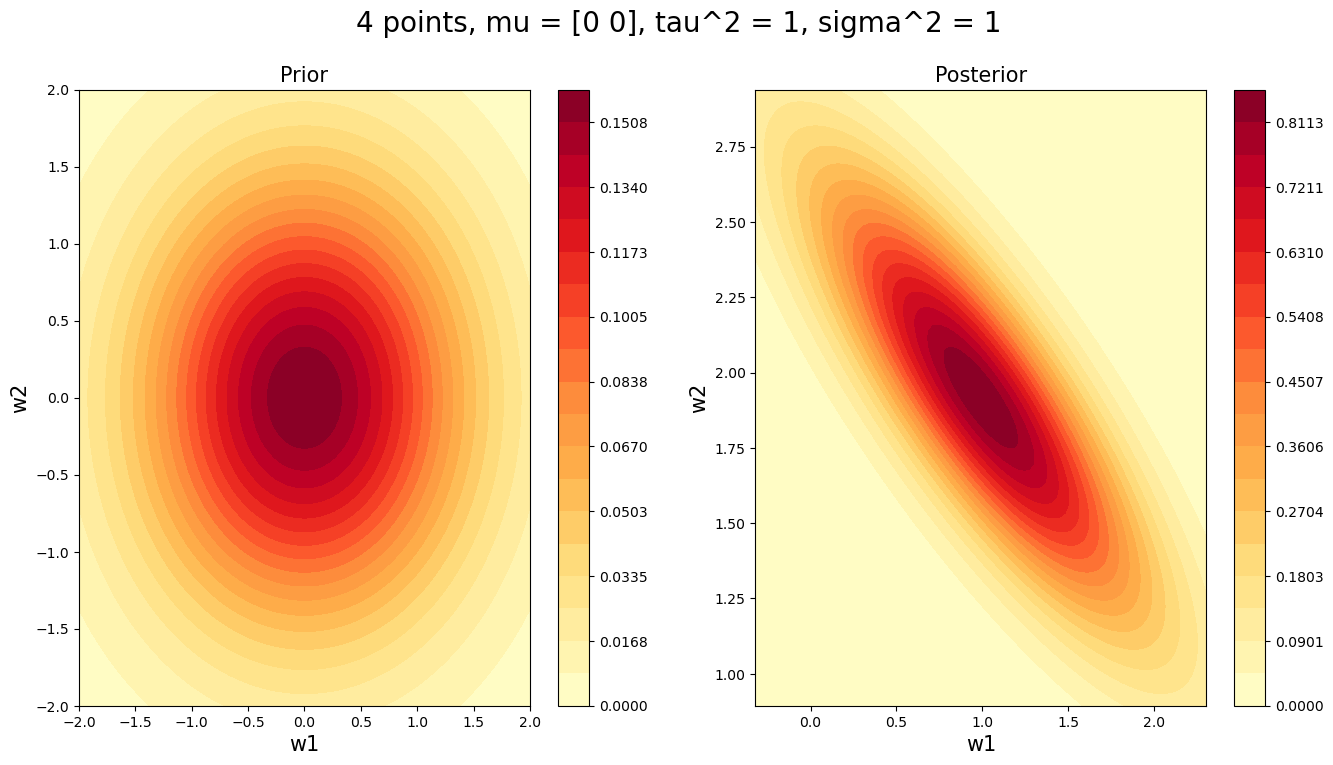

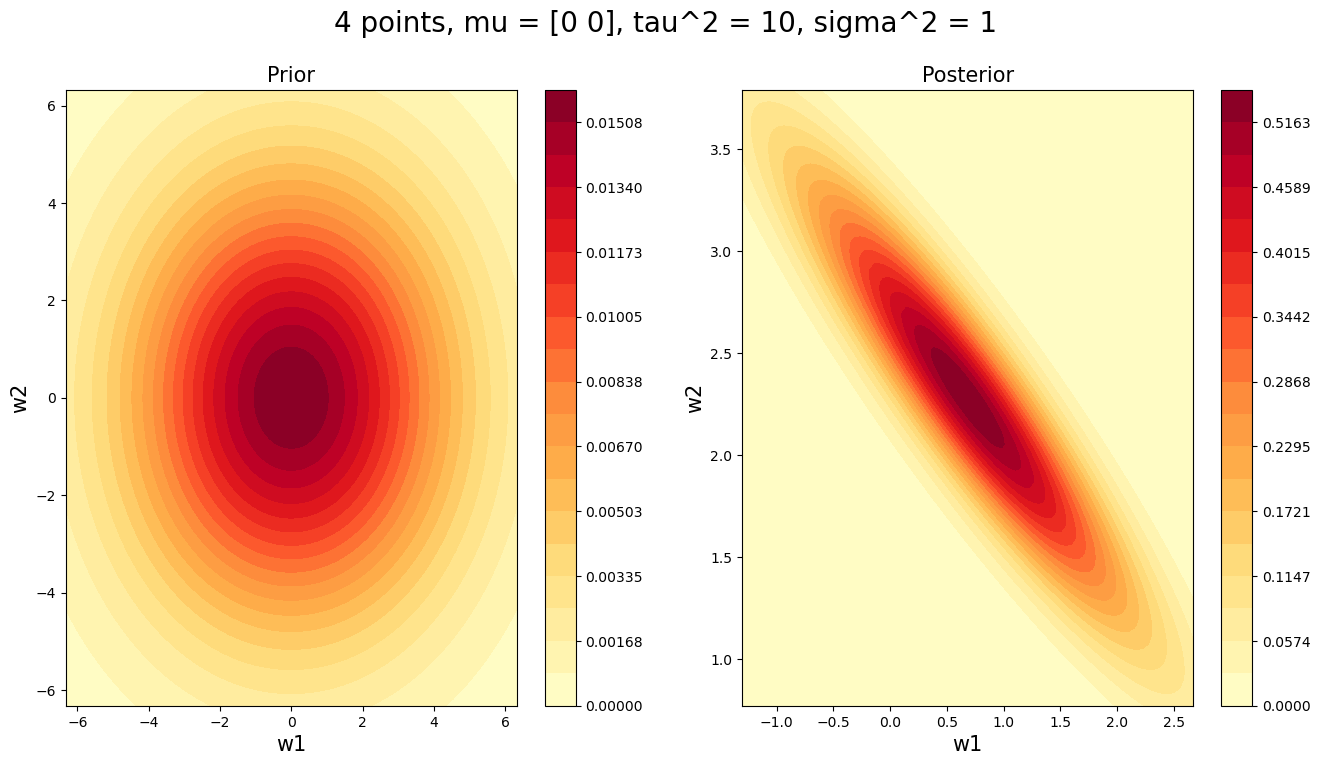

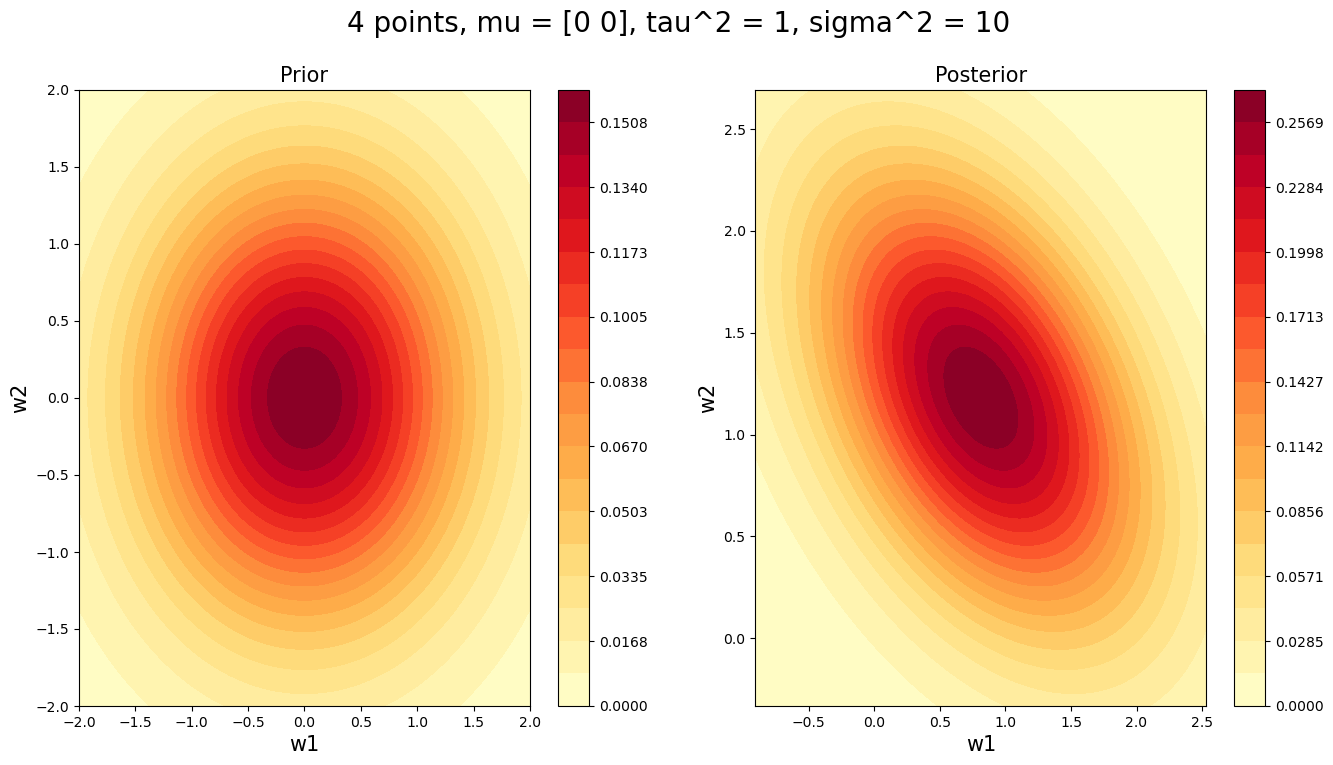

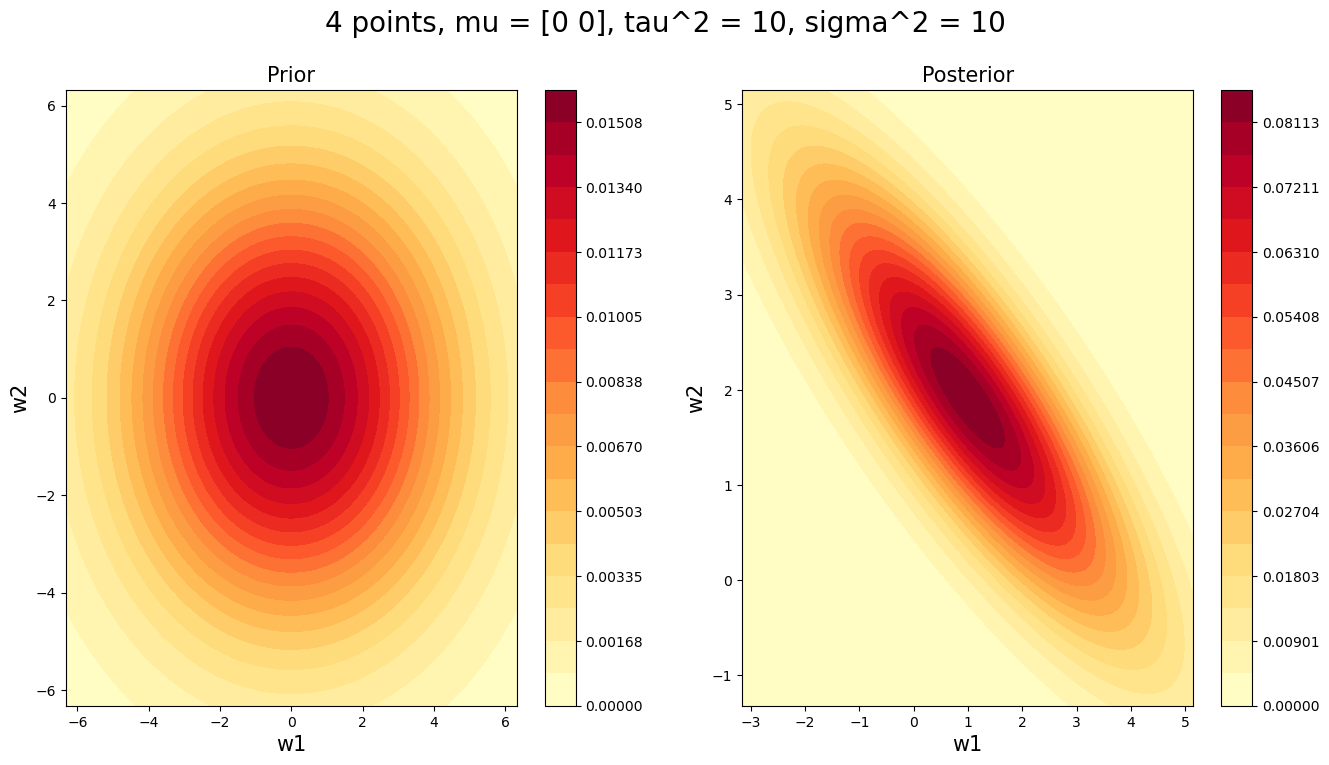

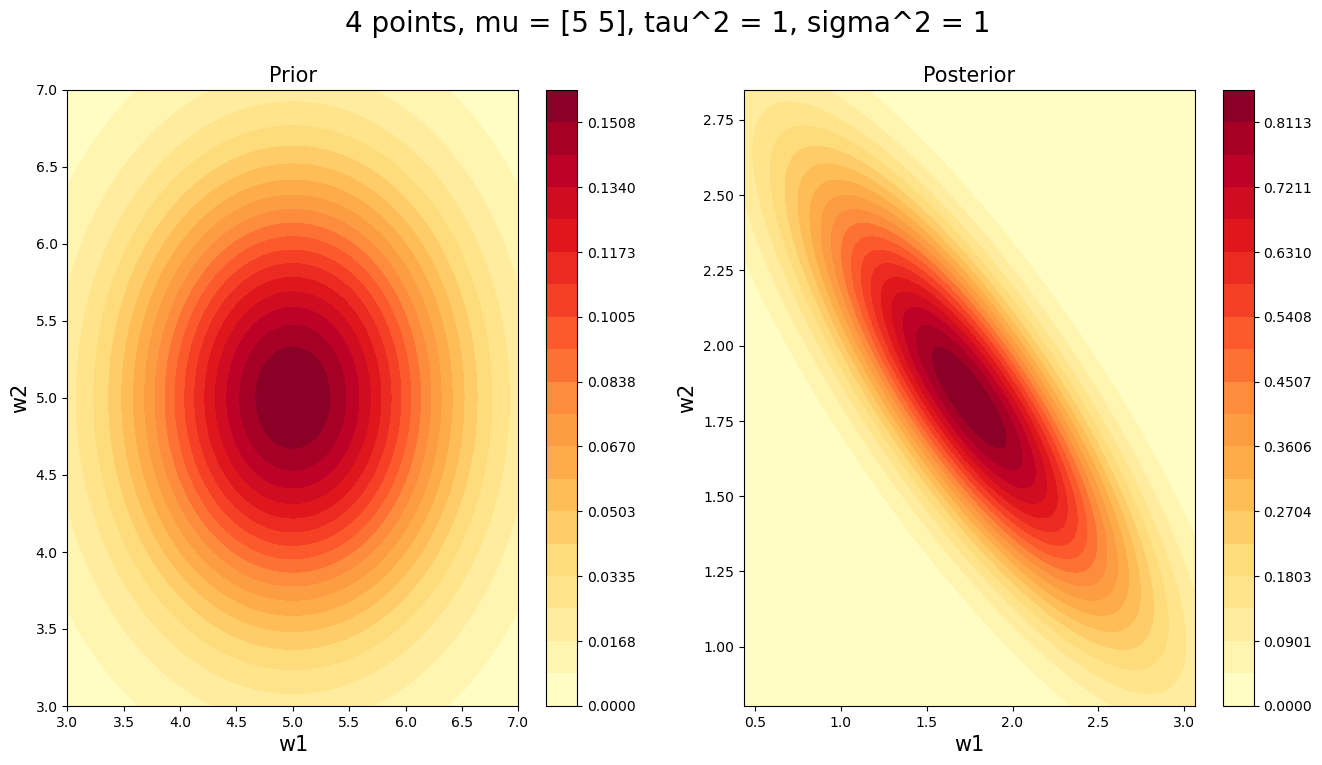

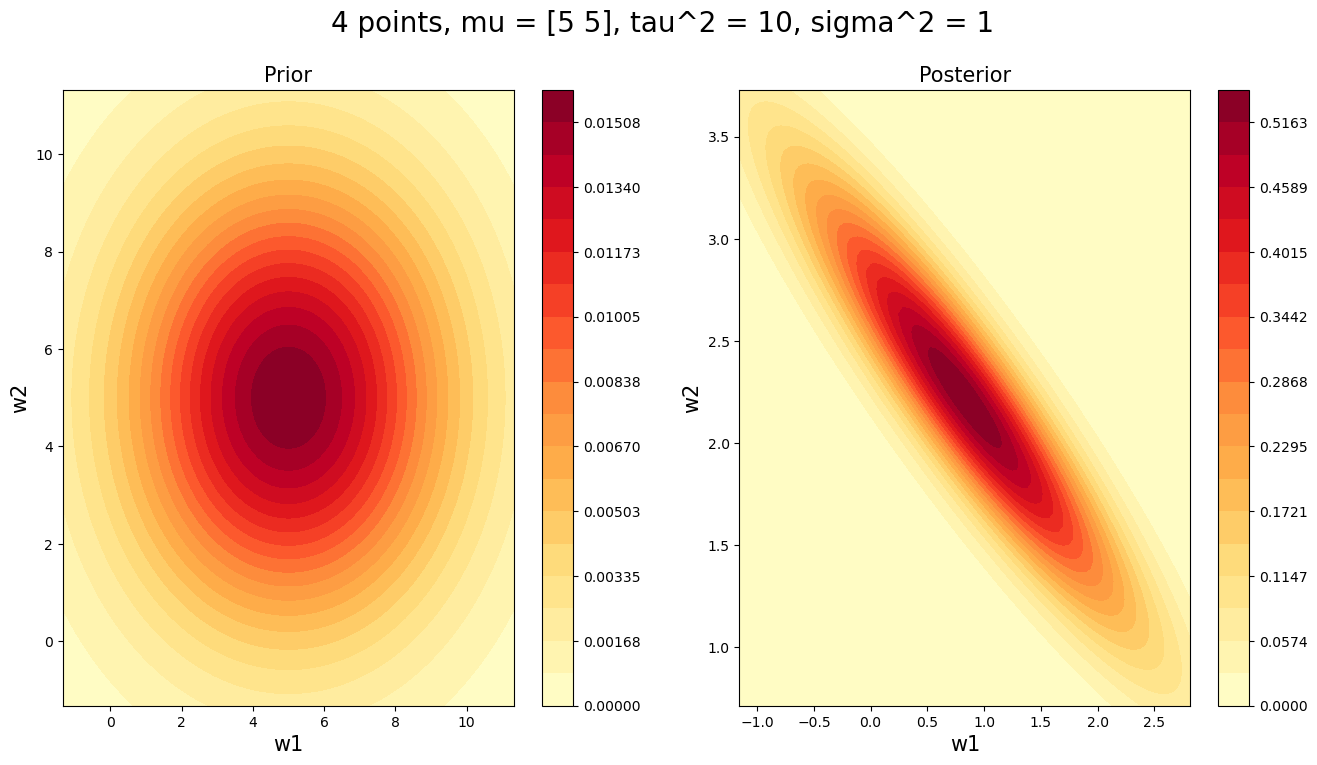

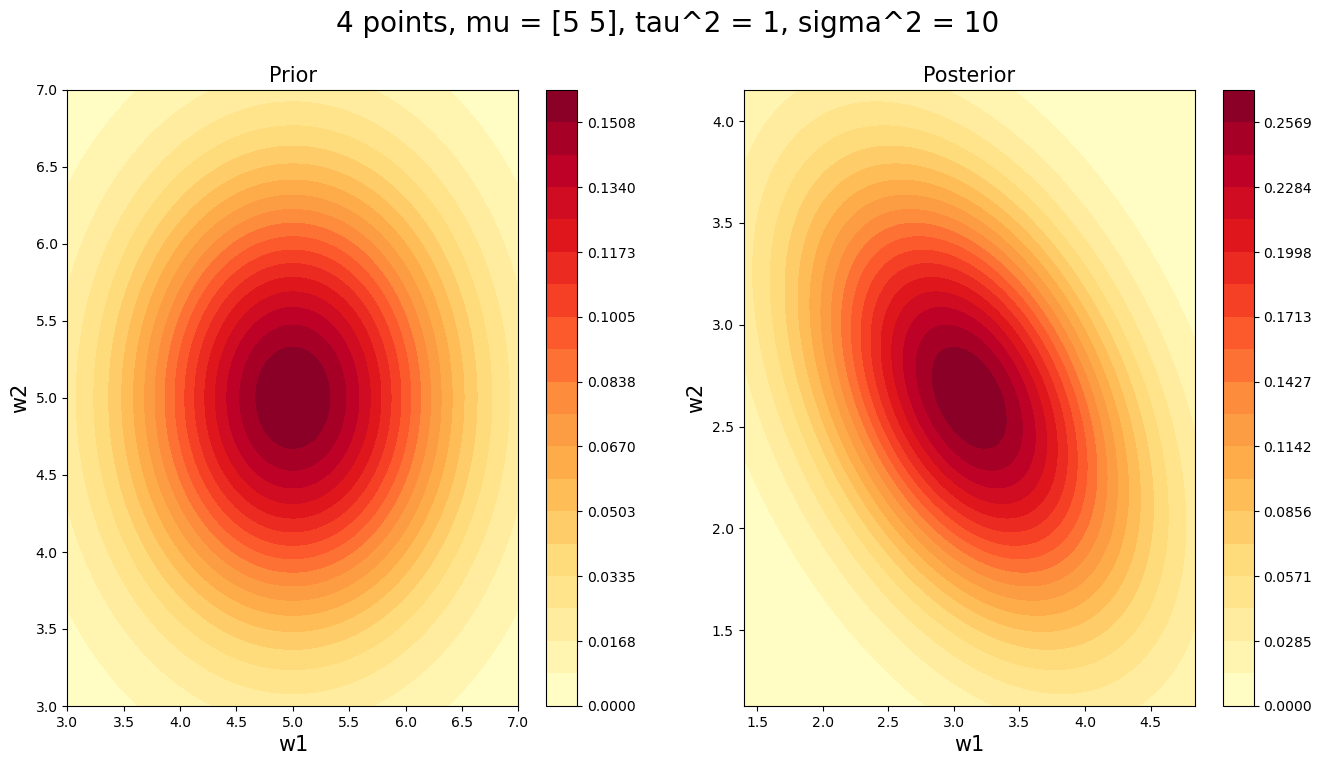

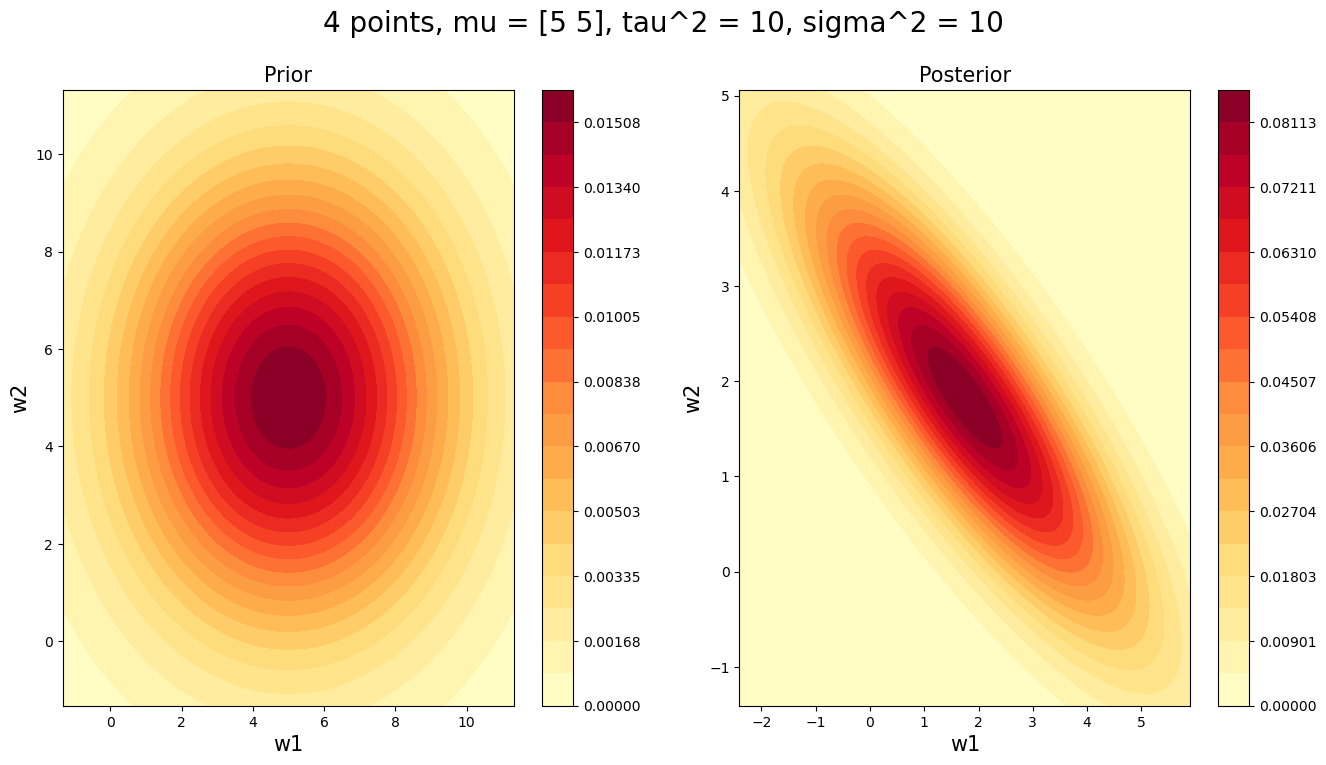

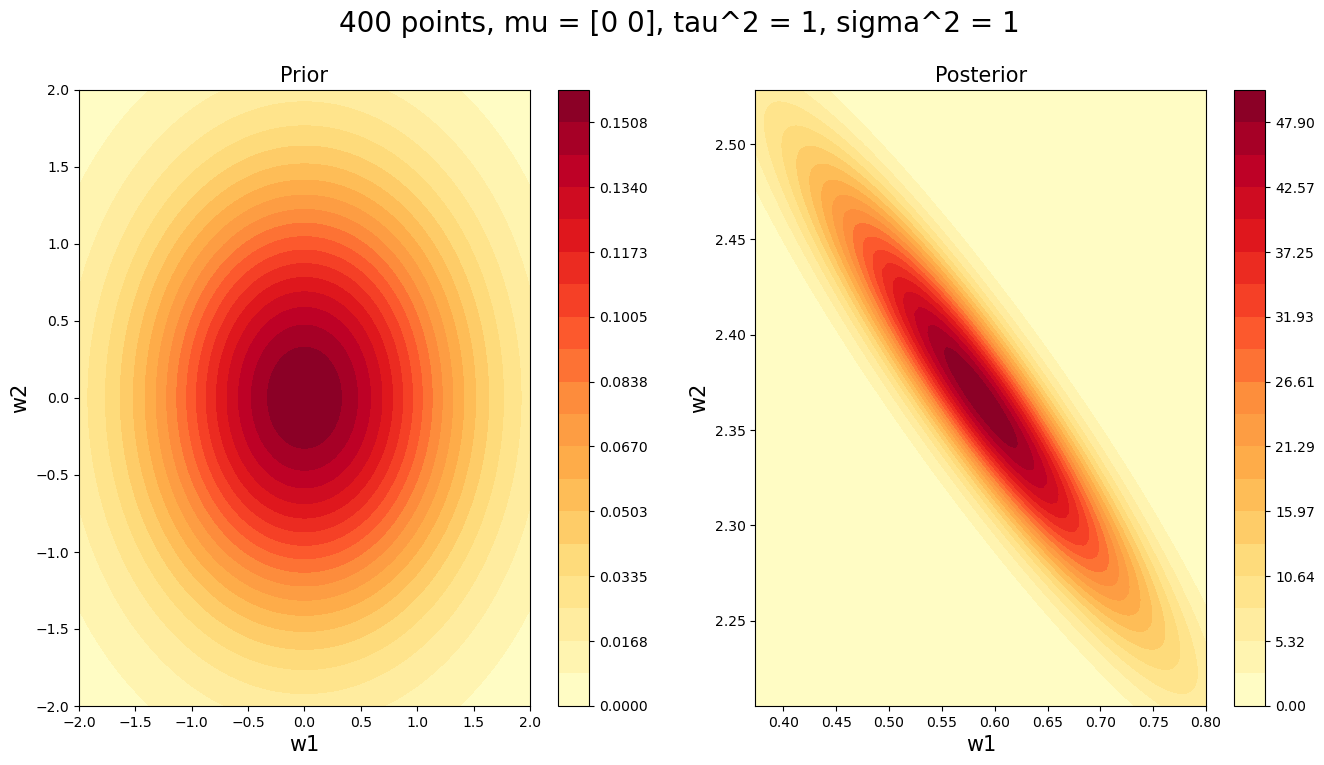

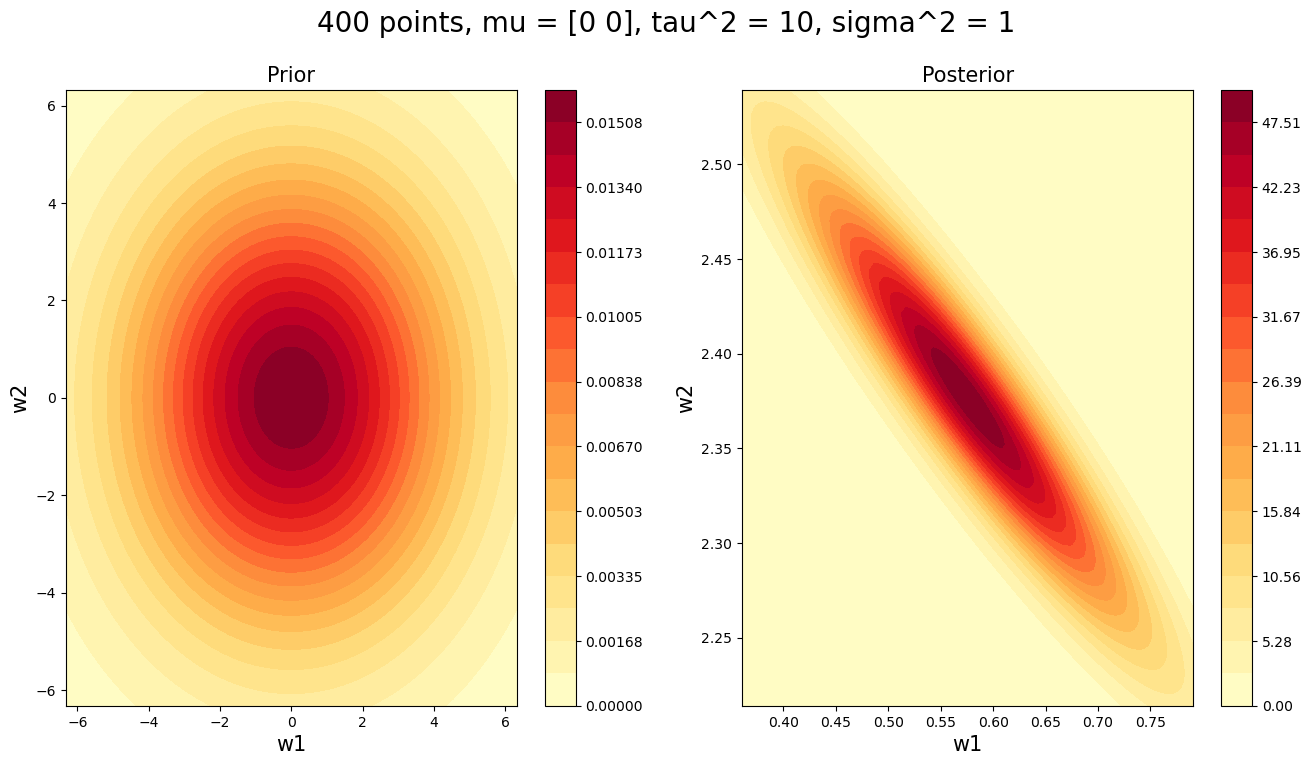

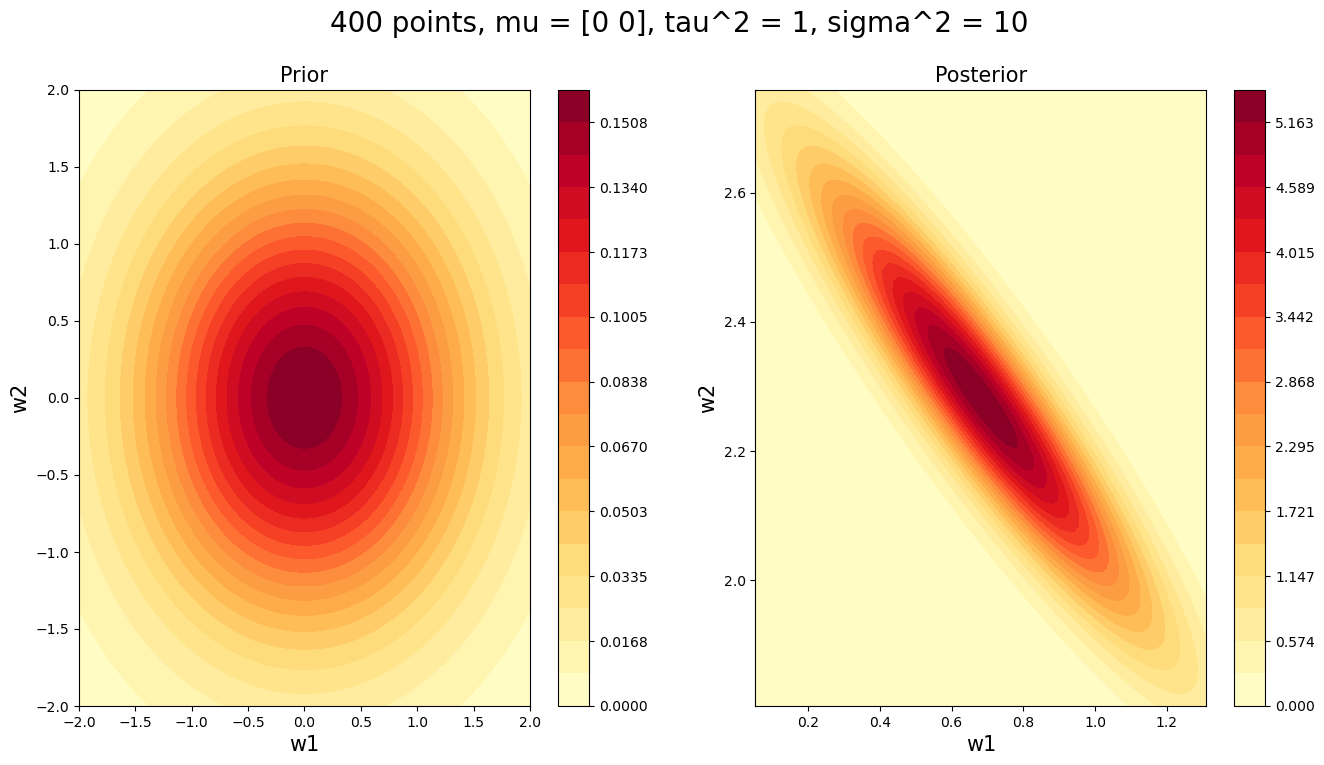

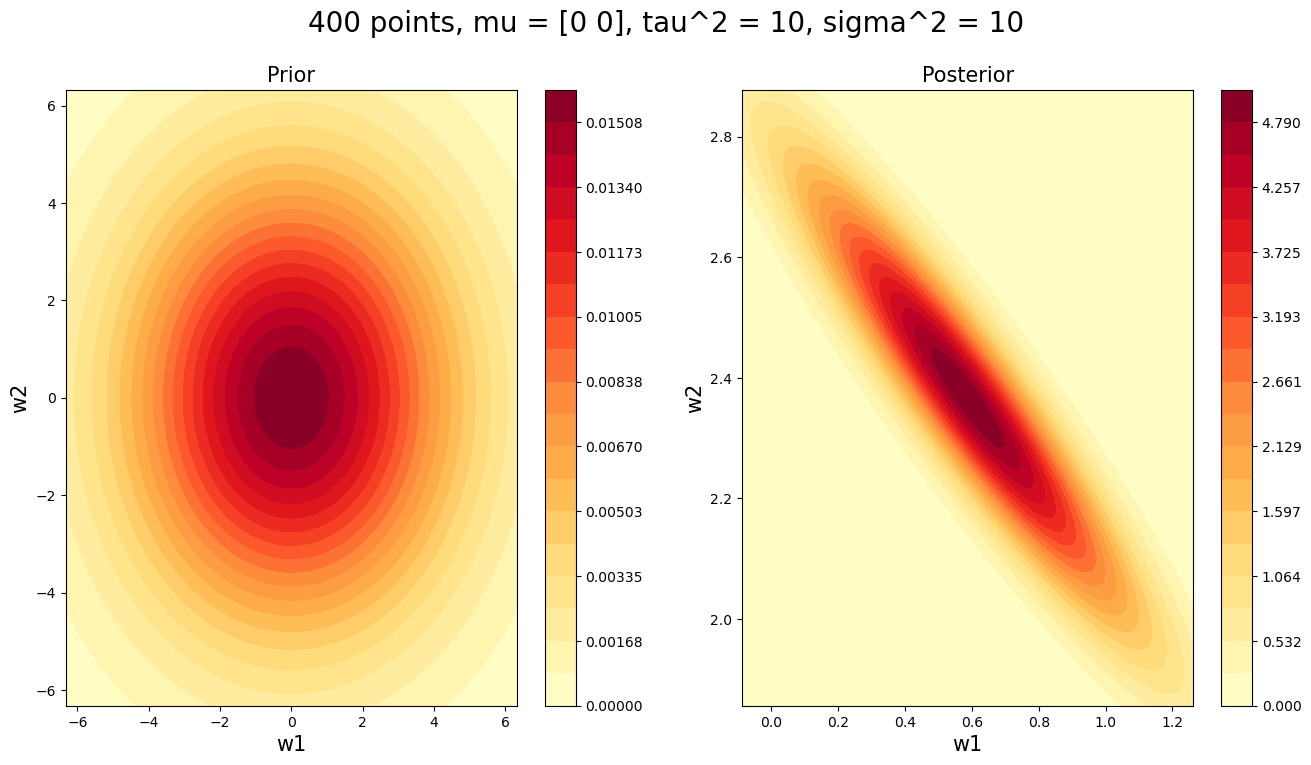

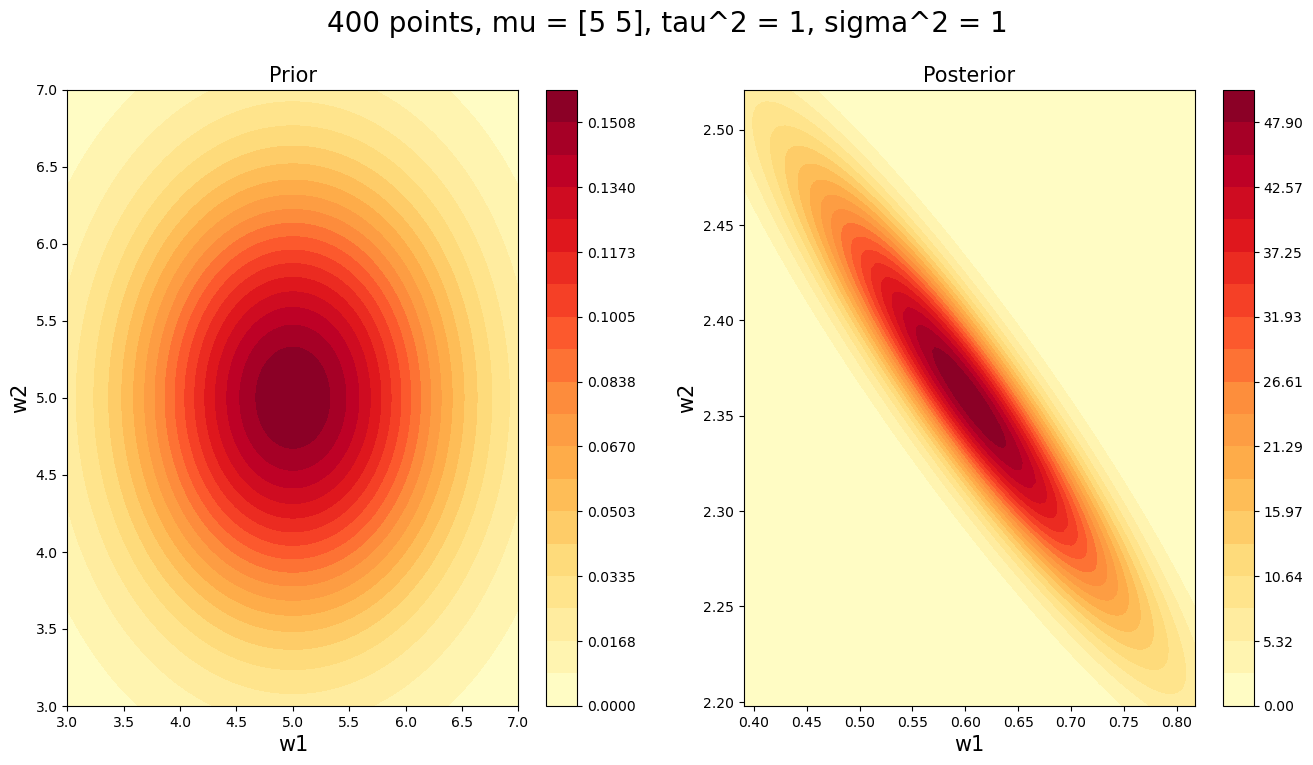

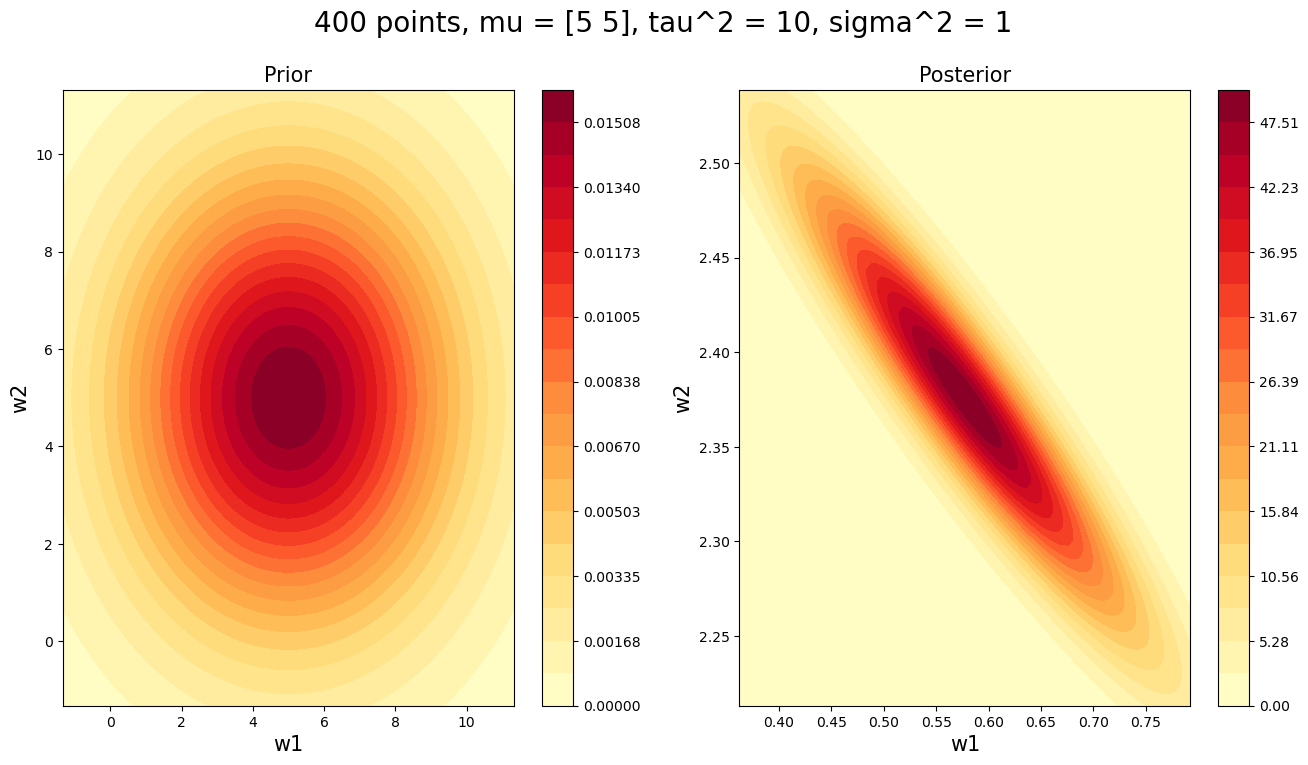

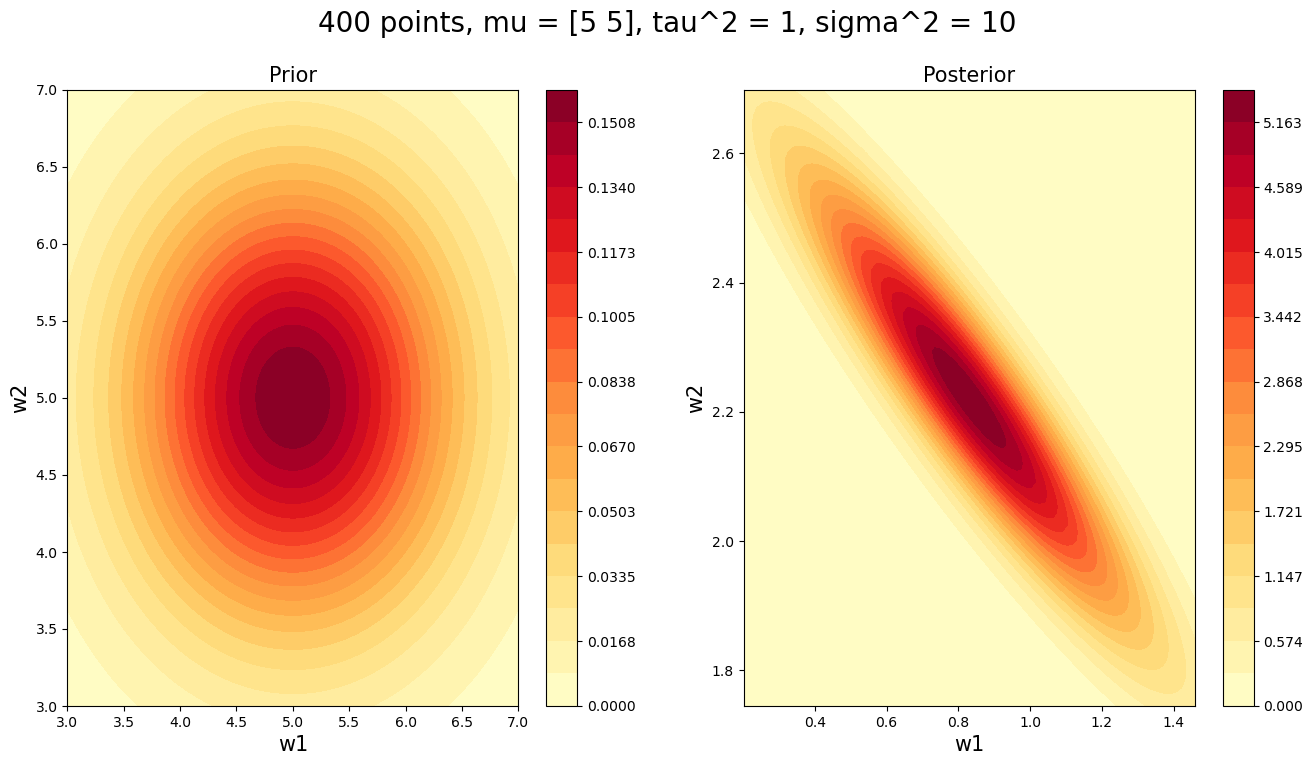

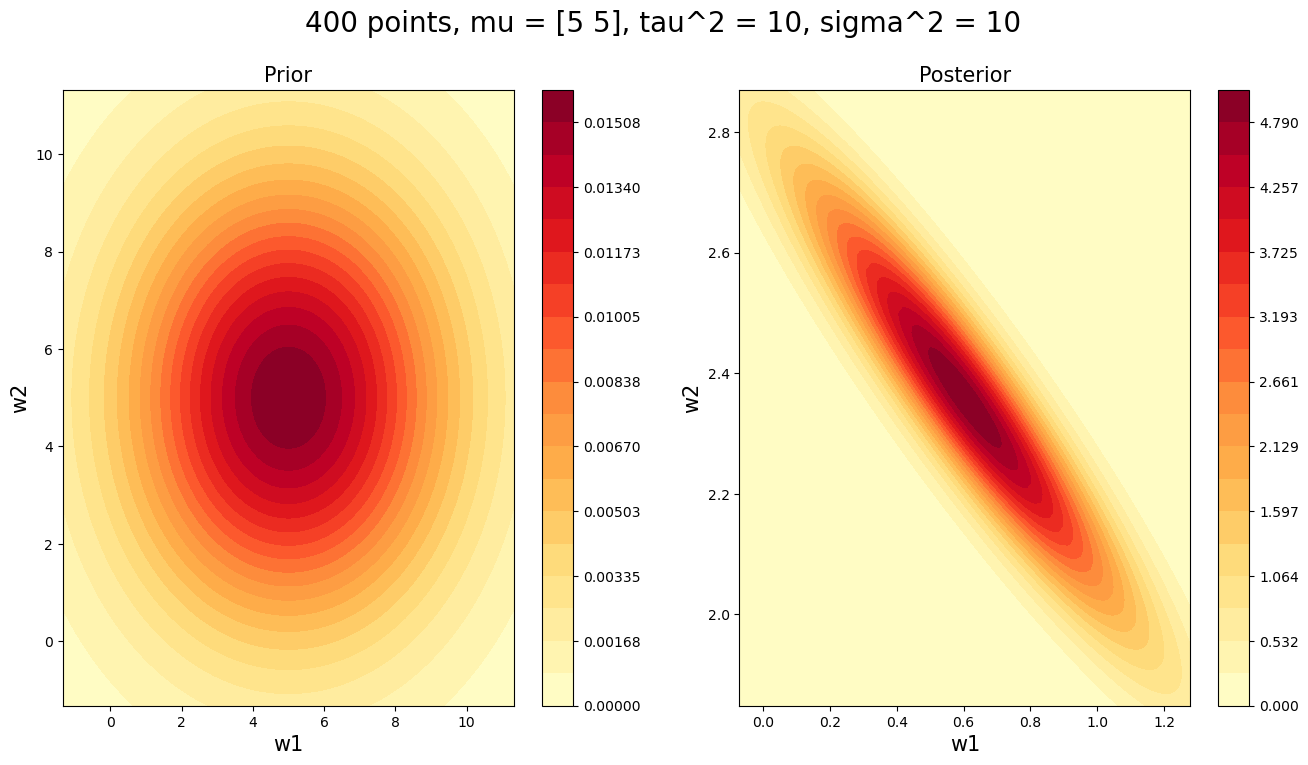

In [11]:
# Cell type : CodeWrite 

def get_prior_probab(w, mu, tau_sq):
    """
    Returns the function value of the prior described by mu and tau_sq, at the point w

    """
    
    return np.exp(-(np.dot(np.subtract(w, mu), np.subtract(w, mu)))/(2*tau_sq))/(2*np.pi*tau_sq)

def get_posterior_params(mu, tau_sq, sigma_sq, X, Y):
    """
    Returns the mean and variance (as a tuple in that order) of the posterior, 
    given the parameters of the prior (mu and tau_sq), variance of the error (sigma_sq), and the train data (X, Y)

    """
    
    n = X.shape[1]
    SIGMA_inv = np.add(np.identity(n=n)/tau_sq, np.matmul(np.transpose(X), X)/sigma_sq)
    SIGMA = np.linalg.inv(SIGMA_inv)
    gamma = np.matmul(SIGMA, np.add(mu/tau_sq, np.matmul(np.transpose(X), Y)/sigma_sq))
    return (gamma, SIGMA)

def get_posterior_probab(w, mu, tau_sq, sigma_sq, X, Y):
    """
    Returns the function value of the posterior described by mu, tau_sq, sigma_sq, X and Y, at the point w,
    where mu and tau_sq are parameters of the prior, sigma_sq is the variance of the error, and X and Y are the train data

    """
    
    # N ( gamma, SIGMA )
    # SIGMA**-1 = (1/tau_sq)np.identity(X.shape[0]) + X.T * X / sigma_sq
    # gamma = SIGMA ( mu/tau_sq + X.T * y / sigma_sq)
    n = X.shape[1]
    SIGMA_inv = np.add(np.identity(n=n)/tau_sq, np.matmul(np.transpose(X), X)/sigma_sq)
    SIGMA = np.linalg.inv(SIGMA_inv)
    gamma = np.matmul(SIGMA, np.add(mu/tau_sq, np.matmul(np.transpose(X), Y)/sigma_sq))
    det_SIGMA = np.linalg.det(SIGMA)
    return np.exp(-0.5 * np.dot(np.subtract(w, gamma), np.matmul(SIGMA_inv, np.subtract(w, gamma))))/(2*np.pi*np.sqrt(det_SIGMA))

def get_prior_matrix(W, mu, tau_sq):
    """
    Returns the prior (described by mu and tau_sq) values for all vectors w in W

    """
    
    prior_matrix = np.array([])
    for w in W:
        prior_matrix = np.append(prior_matrix, get_prior_probab(w, mu, tau_sq))
    return prior_matrix

def get_posterior_matrix(W, mu, tau_sq, sigma_sq, X, Y):
    """
    Returns the posterior values for all vectors w in W,
    given the parameters of the prior (mu and tau_sq), variance of the error (sigma_sq), and the train data (X, Y)
    
    """
    
    posterior_matrix = np.array([])
    for w in W:
        posterior_matrix = np.append(posterior_matrix, get_posterior_probab(w, mu, tau_sq, sigma_sq, X, Y))
    return posterior_matrix


mu_0 = np.array([0, 0])
mu_5 = np.array([5, 5])
mu = np.array([mu_0, mu_0, mu_0, mu_0, mu_5, mu_5, mu_5, mu_5])
tau_sq = np.array([1, 10, 1, 10, 1, 10, 1, 10])
sigma_sq = np.array([1, 1, 10, 10, 1, 1, 10, 10])

# W ~ N(mu[i], tau_sq*I) -> prior
# Ei ~ N(0, sigma_sq)
# Posterior:
# W | x, y ~ 1/np.sqrt(2*np.pi*sigma_sq) * np.exp(-1/(2sigma_sq)(y-wTx)**2) . P(W) / sum (integral) of numerator over all W
# Integral hard to compute so we instead use that W|x,y is normal and determine the mean and variance from the optimization problem

X_small = np.array([
    np.array([1., 2.]),
    np.array([2., 2.1]),
    np.array([0.6, 1.5]),
    np.array([1.1, 0.9])
])
Y_small = np.array([5.1, 6.1, 4.2, 2.9])

X_large = X_small
Y_large = Y_small
for i in range(1, 100):
    X_large = np.append(X_large, X_small, axis=0)
    Y_large = np.append(Y_large, Y_small)

spread = 2 # The ranges of x1 and x2 for the plots is calculated as mu_1 +/- spread*var_1, as a fixed range is not interpretable
# The range of y is also variable and is chosen as 0 to the prior/posterior value at the mean


for i in range(8): # For 4 points, i.e., X_small and Y_small
    # Prior
    tau = np.sqrt(tau_sq[i])
    prior_x_lim = (mu[i][0]-spread*tau,mu[i][0]+spread*tau)
    prior_y_lim = (mu[i][1]-spread*tau,mu[i][1]+spread*tau)
    X,Y = np.meshgrid(np.linspace(prior_x_lim[0], prior_x_lim[1],100), np.linspace(prior_y_lim[0], prior_y_lim[1],100))
    X_grid = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z_prior = get_prior_matrix(X_grid, mu[i], tau_sq[i])
    Z_prior = np.reshape(a=Z_prior, newshape=X.shape, order='C')

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
    max_val = get_prior_probab(mu[i], mu[i], tau_sq[i])
    contour = ax1.contourf(X,Y,Z_prior,levels=np.linspace(0.,max_val , 20),cmap='YlOrRd')
    ax1.set_xlim(prior_x_lim)
    ax1.set_ylim(prior_y_lim)
    ax1.set_title(label="Prior", fontsize=15)
    ax1.set_xlabel(xlabel="w1", fontsize=15)
    ax1.set_ylabel(ylabel="w2", fontsize=15)
    plt.colorbar(contour, ax=ax1)

    # Posterior
    (gamma, SIGMA) = get_posterior_params(mu[i], tau_sq[i], sigma_sq[i], X_small, Y_small)
    sigma = np.sqrt(np.array([SIGMA[0][0], SIGMA[1][1]]))
    posterior_x_lim = (gamma[0]-spread*sigma[0],gamma[0]+spread*sigma[0])
    posterior_y_lim = (gamma[1]-spread*sigma[1],gamma[1]+spread*sigma[1])
    X,Y = np.meshgrid(np.linspace(posterior_x_lim[0], posterior_x_lim[1],100), np.linspace(posterior_y_lim[0], posterior_y_lim[1],100))
    X_grid = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z_posterior = get_posterior_matrix(X_grid, mu[i], tau_sq[i], sigma_sq[i], X_small, Y_small)
    Z_posterior = np.reshape(a=Z_posterior, newshape=X.shape, order='C')

    max_val = get_posterior_probab(gamma, mu[i], tau_sq[i], sigma_sq[i], X_small, Y_small)
    contour = ax2.contourf(X,Y,Z_posterior,levels=np.linspace(0.,max_val , 20),cmap='YlOrRd')
    ax2.set_xlim(posterior_x_lim)
    ax2.set_ylim(posterior_y_lim)
    ax2.set_title(label="Posterior", fontsize=15)
    ax2.set_xlabel(xlabel="w1", fontsize=15)
    ax2.set_ylabel(ylabel="w2", fontsize=15)
    plt.colorbar(contour, ax=ax2)

    plt.suptitle(t="4 points, mu = "+str(mu[i])+", tau^2 = "+str(tau_sq[i])+", sigma^2 = "+str(sigma_sq[i]), fontsize=20)
    plt.show()

for i in range(8): # For 400 points, i.e., X_large and Y_large
    # Prior
    tau = np.sqrt(tau_sq[i])
    prior_x_lim = (mu[i][0]-spread*tau,mu[i][0]+spread*tau)
    prior_y_lim = (mu[i][1]-spread*tau,mu[i][1]+spread*tau)
    X,Y = np.meshgrid(np.linspace(prior_x_lim[0], prior_x_lim[1],100), np.linspace(prior_y_lim[0], prior_y_lim[1],100))
    X_grid = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z_prior = get_prior_matrix(X_grid, mu[i], tau_sq[i])
    Z_prior = np.reshape(a=Z_prior, newshape=X.shape, order='C')

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
    max_val = get_prior_probab(mu[i], mu[i], tau_sq[i])
    contour = ax1.contourf(X,Y,Z_prior,levels=np.linspace(0.,max_val , 20),cmap='YlOrRd')
    ax1.set_xlim(prior_x_lim)
    ax1.set_ylim(prior_y_lim)
    ax1.set_title(label="Prior", fontsize=15)
    ax1.set_xlabel(xlabel="w1", fontsize=15)
    ax1.set_ylabel(ylabel="w2", fontsize=15)
    plt.colorbar(contour, ax=ax1)

    # Posterior
    (gamma, SIGMA) = get_posterior_params(mu[i], tau_sq[i], sigma_sq[i], X_large, Y_large)
    sigma = np.sqrt(np.array([SIGMA[0][0], SIGMA[1][1]]))
    posterior_x_lim = (gamma[0]-spread*sigma[0],gamma[0]+spread*sigma[0])
    posterior_y_lim = (gamma[1]-spread*sigma[1],gamma[1]+spread*sigma[1])
    X,Y = np.meshgrid(np.linspace(posterior_x_lim[0], posterior_x_lim[1],100), np.linspace(posterior_y_lim[0], posterior_y_lim[1],100))
    X_grid = np.transpose(np.array([np.ndarray.flatten(X), np.ndarray.flatten(Y)]))
    Z_posterior = get_posterior_matrix(X_grid, mu[i], tau_sq[i], sigma_sq[i], X_large, Y_large)
    Z_posterior = np.reshape(a=Z_posterior, newshape=X.shape, order='C')

    max_val = get_posterior_probab(gamma, mu[i], tau_sq[i], sigma_sq[i], X_large, Y_large)
    contour = ax2.contourf(X,Y,Z_posterior,levels=np.linspace(0.,max_val , 20),cmap='YlOrRd')
    ax2.set_xlim(posterior_x_lim)
    ax2.set_ylim(posterior_y_lim)
    ax2.set_title(label="Posterior", fontsize=15)
    ax2.set_xlabel(xlabel="w1", fontsize=15)
    ax2.set_ylabel(ylabel="w2", fontsize=15)
    plt.colorbar(contour, ax=ax2)

    plt.suptitle(t="400 points, mu = "+str(mu[i])+", tau^2 = "+str(tau_sq[i])+", sigma^2 = "+str(sigma_sq[i]), fontsize=20)
    plt.show()

** Cell type : TextWrite **

### Observations

Repeating the data points clearly reduces the variance of the posterior of $w$, which intuitively makes sense too as the repetition implies high belief in those values.

The values of $\mu$, $\tau^2$ and $\sigma^2$ all have an effect on the mean of the posterior. The effect of $\mu$ can be observed in the case of 4 points, between $\mu = [0, 0]$ and $\mu = [5, 5]$ for the same $\tau^2$ and $\sigma^2$, and the effect of the variances can be seen similarly.

The effect on the variance of the posterior is also interpretable via the y values of the distribution, with high y values being consequent of a small variance, compressing the curve. The absence of effect of $\mu$ on the variance of the posterior is clearly visible as there is no change in the plot between different $\mu$'s for the same data size, $\tau^2$ and $\sigma^2$ (aside from the shift in posterior mean).

Both $\tau^2$ and $\sigma^2$ affect the variance, as can be seen from the case of 4 points, with different values for different values of $\sigma^2$ and $\tau^2$, with the variance seeming to increase as either of the two increase. The effect of $\tau^2$ is almost absent for the case of 400 points, as can be seen in the significantly lower variance for $\sigma^2 = 1$ as compared to $\sigma^2 = 10$, with very minimal difference between $\tau^2 = 1$ and $\tau^2 = 10$, which can be attributed to high belief in data due to repetition than in the prior.

Most posterior distributions have mean (mode) around $(1, 2)$, i.e., $w = x_1 + 2*x_2$ which is a good linear fit for the data, with variations being caused by values of $\mu$, $\tau^2$ and $\sigma^2$.